In [1]:
# Imports from the entire program
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder # One-hot encoding
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

# **Read data from CSV**

This section aims to read all the necessary data from the CSV file. As we can see it contains two columns for each of the points generated by the posenet model. For instance, x0 and y0 correspond to the first point. Additionally, the last column corresponds to the label of the point.

In [2]:
data = pd.read_csv('Data.csv')
data

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y5,x6,y6,x7,y7,x8,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,label
0,360.013705,159.627099,354.746301,153.009386,367.157390,152.534758,347.461785,156.530904,376.158980,156.660882,337.795217,183.355665,389.894446,185.060304,293.335663,183.729718,437.576138,181.522235,250.465392,182.384071,245.971834,182.576633,339.875006,270.074613,384.560876,273.693020,436.026999,321.488710,437.743281,325.850503,435.730557,394.280146,435.453753,395.842443,right_hip
1,361.581720,161.648523,356.569929,154.260259,368.360679,153.739996,349.923240,155.402228,376.936939,157.994073,339.567077,184.676552,390.435212,186.963276,293.748592,185.618544,432.933277,185.243394,241.835810,187.030854,242.060160,188.006315,343.371892,271.214785,386.041808,273.933121,437.317433,323.940785,439.868958,321.675881,437.309968,396.459443,435.578588,395.862177,right_hip
2,363.174721,163.991466,356.680321,156.701219,369.022974,156.285017,349.894964,159.454501,377.938579,159.107582,342.257362,190.015466,392.080697,189.564668,297.305017,195.093860,436.879305,181.759746,252.936415,196.870873,273.141143,377.072251,349.596693,272.023616,387.696221,274.721517,444.493629,325.637415,445.365816,323.848844,438.609695,395.386910,435.102236,394.317239,right_hip
3,362.761304,165.765602,356.488025,158.970721,369.087571,158.905336,349.773206,162.725960,377.430370,161.279480,341.127718,192.667305,393.014388,189.550934,295.954466,199.276856,436.079240,183.395788,257.464771,199.103740,271.755247,379.232607,351.864238,277.626659,388.112075,279.462556,447.437820,324.967972,447.291732,323.234523,439.817174,395.119979,436.068835,394.939691,right_hip
4,365.350581,166.813330,358.592403,160.345269,371.793395,159.945634,353.128193,164.370132,379.658182,162.992144,346.704149,192.345755,391.169248,191.071752,296.998032,198.911711,440.864259,185.834403,259.408663,199.810992,267.768495,381.215262,352.300537,277.690947,393.641886,279.347622,452.162448,326.560358,446.206787,323.075218,440.523712,396.472173,435.342690,396.186787,right_hip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,334.327034,125.463753,325.140217,118.473388,341.558533,116.625971,316.243351,124.584382,351.980481,124.822275,311.902752,164.588519,358.161162,156.956165,303.115853,226.536183,366.410449,218.209718,311.613013,286.802306,326.951961,293.606581,311.997483,263.643004,353.086998,260.040859,390.986368,283.462432,392.769927,282.458085,332.120430,293.387525,333.373294,295.977831,lotus
2408,331.771731,110.809423,321.946385,101.143517,339.960870,100.040202,314.941979,107.790238,349.942985,109.579380,308.970810,148.505098,360.689225,141.427345,290.739927,207.196682,378.808892,83.066439,300.311062,260.050056,333.403946,280.128253,311.608107,252.113801,353.493741,252.408460,261.276472,281.480142,402.802759,264.981464,332.972522,279.877097,336.981761,282.400131,lotus
2409,332.634275,102.314806,324.506045,92.641135,341.494119,93.239140,316.059739,97.963268,351.644976,101.509621,311.290488,142.402730,360.037259,135.295877,299.325968,205.396081,379.720493,76.837892,309.845115,258.890089,327.371228,273.177036,313.775832,249.886203,360.218768,247.333629,268.762974,267.589921,407.375204,262.001192,331.144476,268.670494,334.922387,270.929186,lotus
2410,334.250920,94.864301,327.671966,86.288776,342.459713,85.243011,317.807527,91.173976,354.285016,94.081524,312.770506,137.883154,361.828405,136.027751,304.186415,196.621835,363.599076,194.736100,302.929255,246.413640,336.633398,266.740890,317.626597,221.414407,358.004668,219.285815,408.997410,254.399977,411.010317,251.082974,337.195386,265.619934,339.278099,267.972151,lotus


# **Data preparation**

This section aims to prepare data to be fed into the neural network

## **One Hot Encoding**

It represents each categorical variable with a binary vector that has one element for each unique label and marking the class label with a 1 and all other elements 0.

In [3]:
def one_hot_encoding_targets(y_train, y_test):
  # Creating one hot encoder object 
  onehotencoder = OneHotEncoder()
  # Reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
  y_train_enc = onehotencoder.fit_transform(y_train.values.reshape(-1,1)).toarray()
  y_test_enc = onehotencoder.fit_transform(y_test.values.reshape(-1,1)).toarray()
	
  return y_train_enc, y_test_enc

## **Normalization and shuffling**
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less by removing bias.

In [4]:
# Max and min values are calculated to be used at javascript's normalization
maximun = data.drop(["label"], axis = 1).to_numpy().max()
minimun = data.drop(["label"], axis = 1).to_numpy().min()
print("Max: " + str(maximun))
print("Min: " + str(minimun))

Max: 637.5225709626529
Min: 1.3238226404056377


In [5]:
# Split into x and y
x_not_normalized = data.drop(["label"], axis = 1)
y_not_discretized = data["label"]

# Normalize x
aux = 'xs.'
for column in x_not_normalized:
  for j in range(0, len(x_not_normalized[column])):
    x_not_normalized[column][j] = (x_not_normalized[column][j] - minimun)/(maximun - minimun) 
x = x_not_normalized

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_not_discretized, test_size=0.1, random_state=42)

antes = y_train
# Prepare output data
y_train, y_test = one_hot_encoding_targets(y_train, y_test)

# At this moment x_train, y_train, x_test, y_test are available for the NN
#x_train.shape

In [6]:
pd.set_option('max_rows', 99999)
print(antes)

1320        left_hip
1596     left_dorsal
2377           lotus
1359        left_hip
792             tree
1211       right_hip
1604     left_dorsal
361                y
1970            tree
952         triangle
149         left_hip
208         left_hip
1091           lotus
2057             sun
642         mountain
1378        left_hip
332                y
1488               y
2020            tree
937         triangle
1721    right_dorsal
163         left_hip
438     right_dorsal
1264       right_hip
1815        mountain
1658    right_dorsal
544         mountain
1725    right_dorsal
869              sun
49         right_hip
67         right_hip
1764        mountain
48         right_hip
598         mountain
1223       right_hip
1753    right_dorsal
808              sun
124        right_hip
1925            tree
564         mountain
829              sun
1368        left_hip
414     right_dorsal
2226        triangle
2247        triangle
321                y
1980            tree
1404        l

In [7]:
with np.printoptions(threshold=np.inf):
    print(y_train)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0.

# **Neural network Model**
This section aims to design and test different experiments feeding the data into several neural network models. So it can be determined **which architecture delivers the best results** for the data.

The **K-Fold Cross-Validation** method is an iterative process. It consists of randomly dividing the data into k groups of approximately equal size, k-1 groups are used to train the model and one of the groups is used as validation. This process is repeated k times using a different group as validation in each iteration. The process generates k error estimates, the average of which is used as the final estimate. 

The experiments are going to be run using **10 folds** (i.e. k = 10).

In [8]:
# Store the results of the different experiments
experiments = []

In [9]:
'''This function creates the data structures necessaries for creating 
the accuracy and loss graphs at the k-fold.'''
def create_graph_structures(history):
  aux_accuracy = []
  aux_val_accuracy = []
  aux_loss = []
  aux_val_loss = []

  for element in history.history['accuracy']:
    aux_accuracy.append(element)

  for element in history.history['val_accuracy']:
    aux_val_accuracy.append(element)

  for element in history.history['loss']:
    aux_loss.append(element)

  for element in history.history['val_loss']:
    aux_val_loss.append(element)
  
  return aux_accuracy, aux_val_accuracy, aux_loss, aux_val_loss

'''This function calculates the mean for every epoch taking into account all the folds involved.  '''
def calculate_means (graph_data_accuracy, graph_data_val_accuracy, graph_data_loss, graph_data_val_loss, number_epochs):
  mean_accuracy = []
  mean_val_accuracy = []
  mean_loss = []
  mean_val_loss = []
  
  # Name of the columns. Epochs
  name_columns = []
  for i in range(0, number_epochs):
    name_columns.append(str(i))

  df_accuracy = pd.DataFrame(np.array(graph_data_accuracy), columns=name_columns)
  df_val_accuracy = pd.DataFrame(np.array(graph_data_val_accuracy), columns=name_columns)
  df_loss = pd.DataFrame(np.array(graph_data_loss), columns=name_columns)
  df_val_loss = pd.DataFrame(np.array(graph_data_val_loss), columns=name_columns)

  for column in df_accuracy:
    mean_accuracy.append(df_accuracy[column].mean())

  for column in df_val_accuracy:
    mean_val_accuracy.append(df_val_accuracy[column].mean())

  for column in df_loss:
    mean_loss.append(df_loss[column].mean())

  for column in df_val_loss:
    mean_val_loss.append(df_val_loss[column].mean())

  return mean_accuracy, mean_val_accuracy, mean_loss, mean_val_loss


## **Experiment 1**

Name: 001-Poses-34-10

Learning Rate: 0.3

Epochs: 30

Architecture: 34D-10D

In [10]:
LEARNING_RATE = 0.3
EPOCHS = 30
NUM_FOLDS = 10
VERBOSITY = False
NAME = '001-Poses-34-10'

# Define the K-fold Cross Validator
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
result = []

# Define structures for storing results in the graphs
graph_data_accuracy = []
graph_data_val_accuracy = []
graph_data_loss = []
graph_data_val_loss = []

for cv_train, cv_validation in kfold.split(x_train, y_train):
  
  ''' 
  Neural network structure: 34 inputs and x neurons at the output layer for x classes
  The hidden layer uses a rectifier activation function which is a good practice
  Softmax function at the output layer is used for the multiclass
  '''
  # Neural network structure
  model = Sequential()
  model.add(Dense(34, input_dim=34, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  '''
  Efficient Adam gradient descent optimization algorithm
  Logarithmic loss function, categorical_crossentropy
  '''
  # Model creation
  adam_optimizer = keras.optimizers.Adam(lr= LEARNING_RATE)
  model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Training
  history = model.fit(x_train.iloc[cv_train], y_train[cv_train], epochs=EPOCHS, validation_data=(x_train.iloc[cv_validation], y_train[cv_validation]), verbose=VERBOSITY)

  aux_accuracy, aux_val_accuracy, aux_loss, aux_val_loss = create_graph_structures(history)
  graph_data_accuracy.append(aux_accuracy)
  graph_data_val_accuracy.append(aux_val_accuracy)
  graph_data_loss.append(aux_loss)
  graph_data_val_loss.append(aux_val_loss)

  # Generate generalization metrics
  scores = model.evaluate(x_train.iloc[cv_validation], y_train[cv_validation], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  result.append(scores[1])

  # Fold number
  fold_no = fold_no + 1

# Metrics for graphs
mean_accuracy, mean_val_accuracy, mean_loss, mean_val_loss = calculate_means (graph_data_accuracy, graph_data_val_accuracy, graph_data_loss, graph_data_val_loss, EPOCHS)

# Print mean accuracy for the experiment
experiments.append(statistics.mean(result))
print(f'Accuracy K-Fold: {statistics.mean(result)*100}%')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.6035377979278564; accuracy of 91.24423861503601%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.5681412220001221; accuracy of 84.3317985534668%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.46042510867118835; accuracy of 96.77419066429138%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.5588498115539551; accuracy of 90.78341126441956%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.6620463132858276; accuracy of 89.86175060272217%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.49260

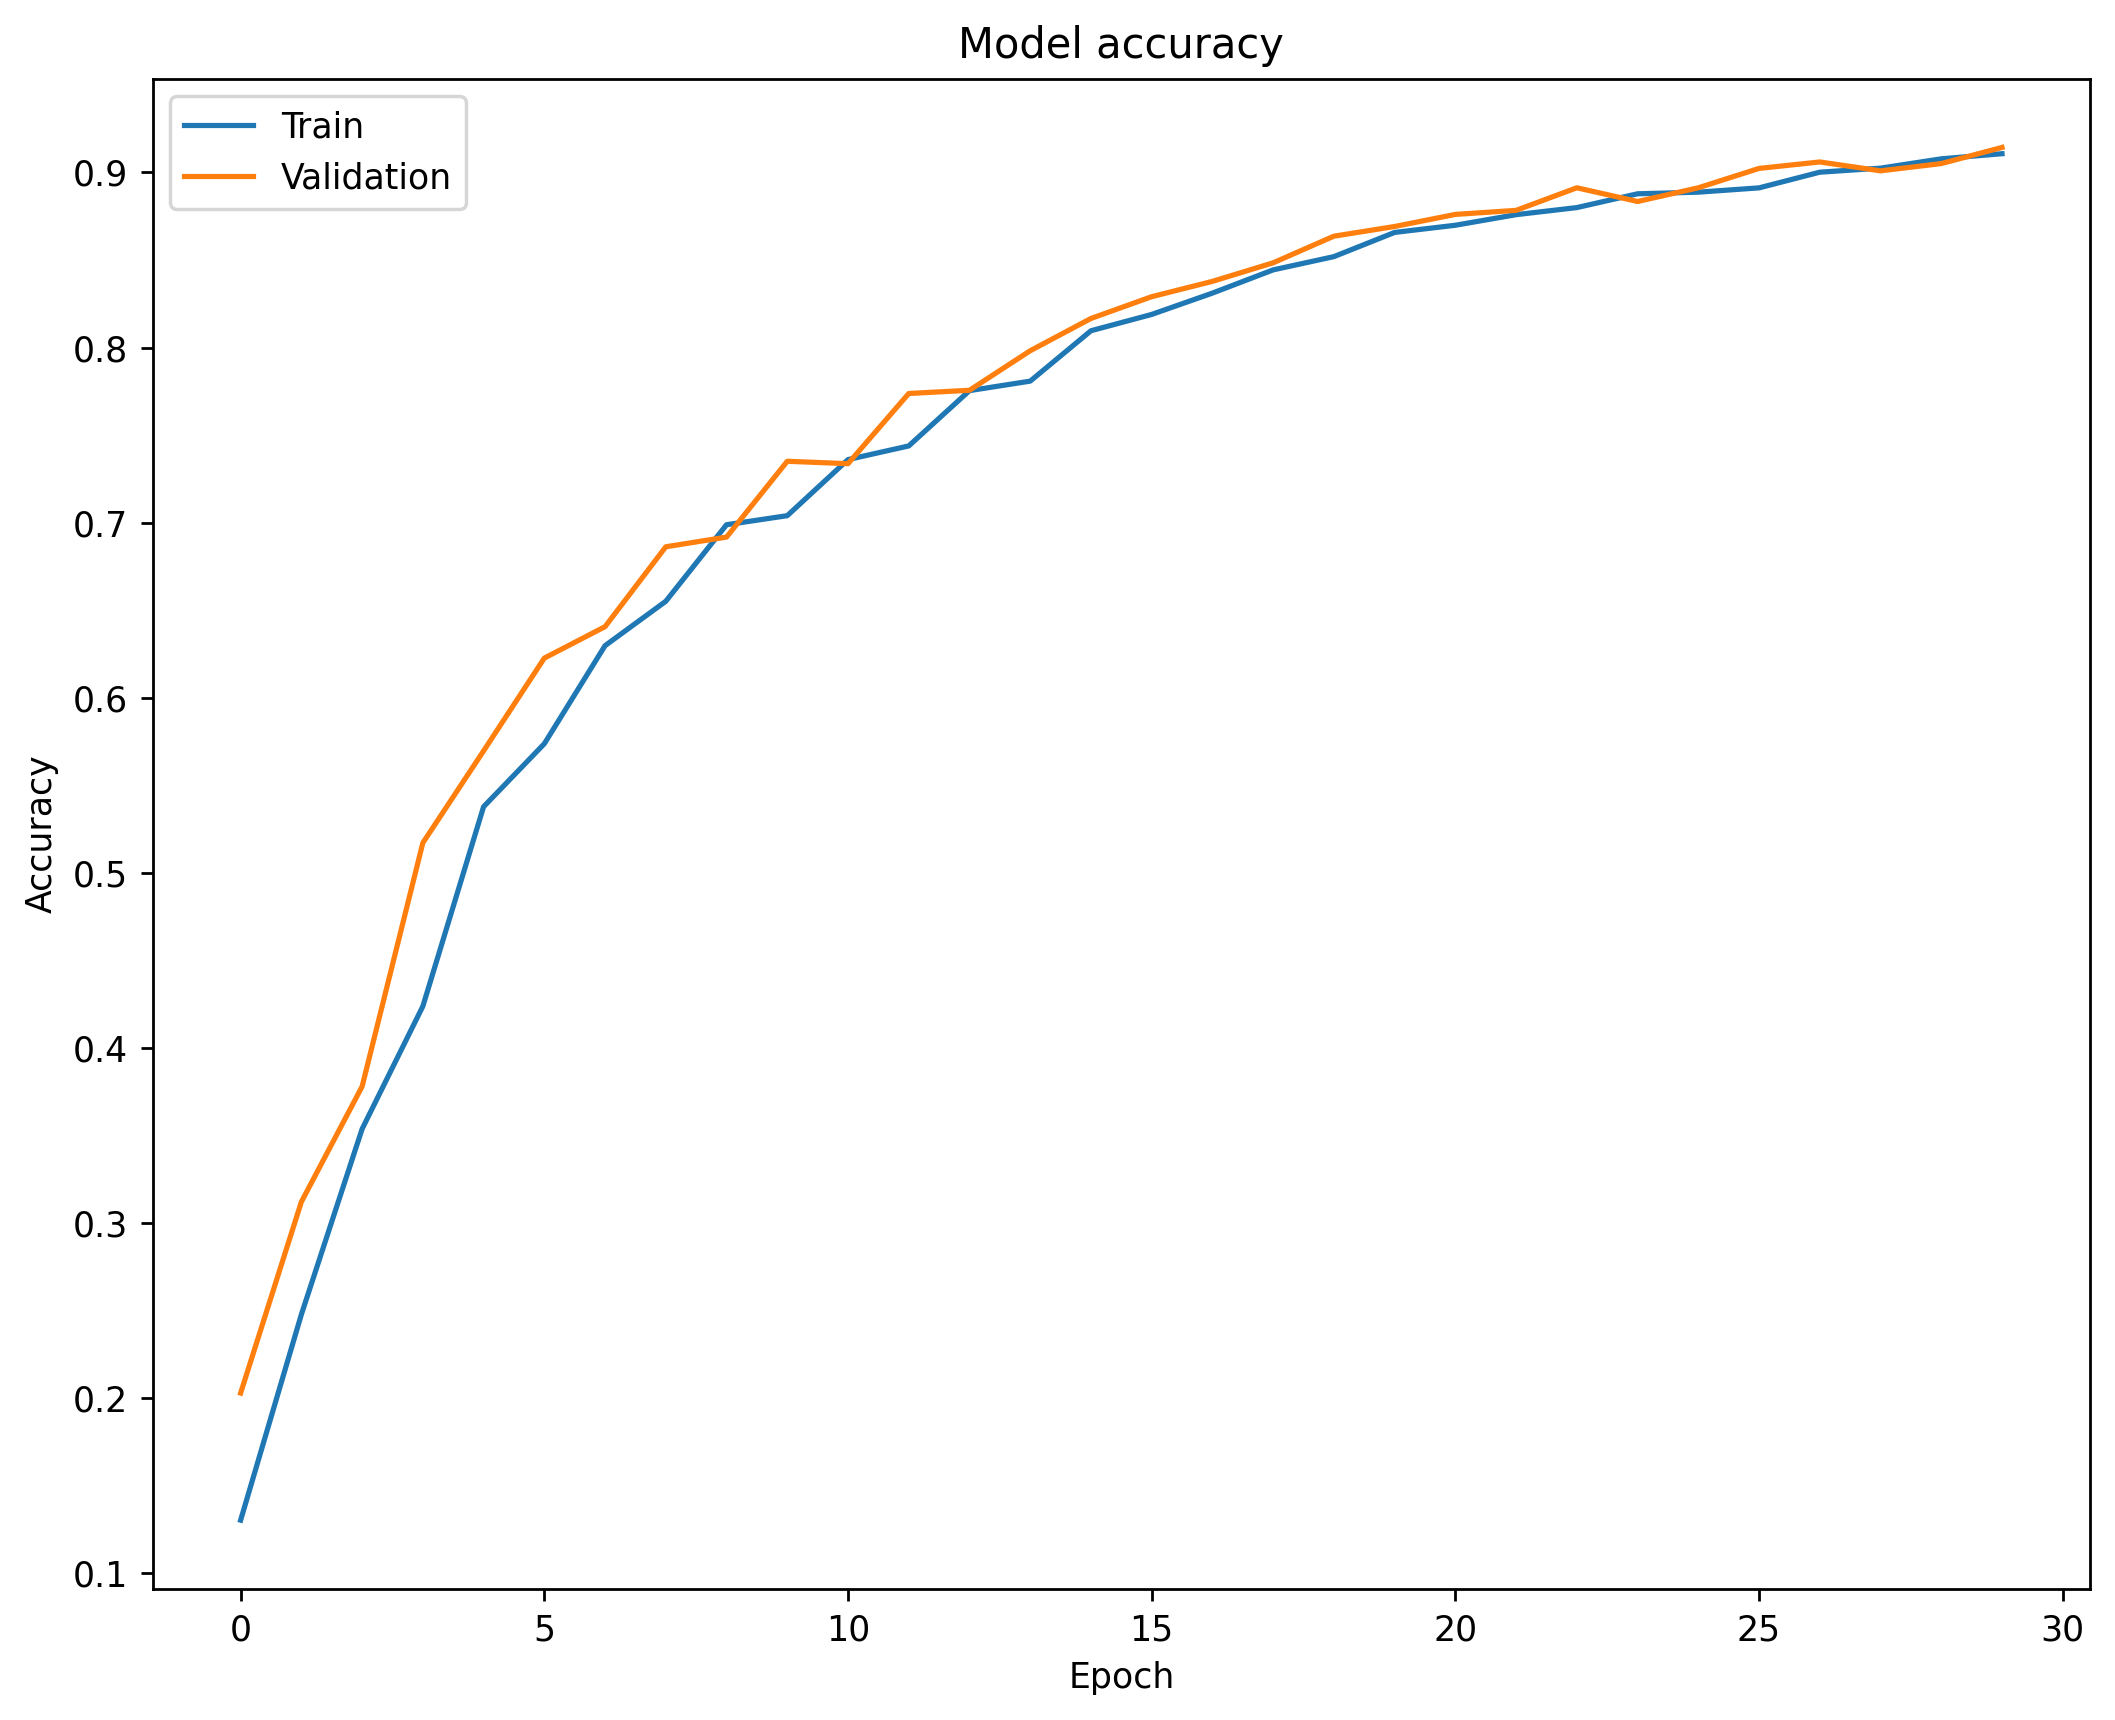

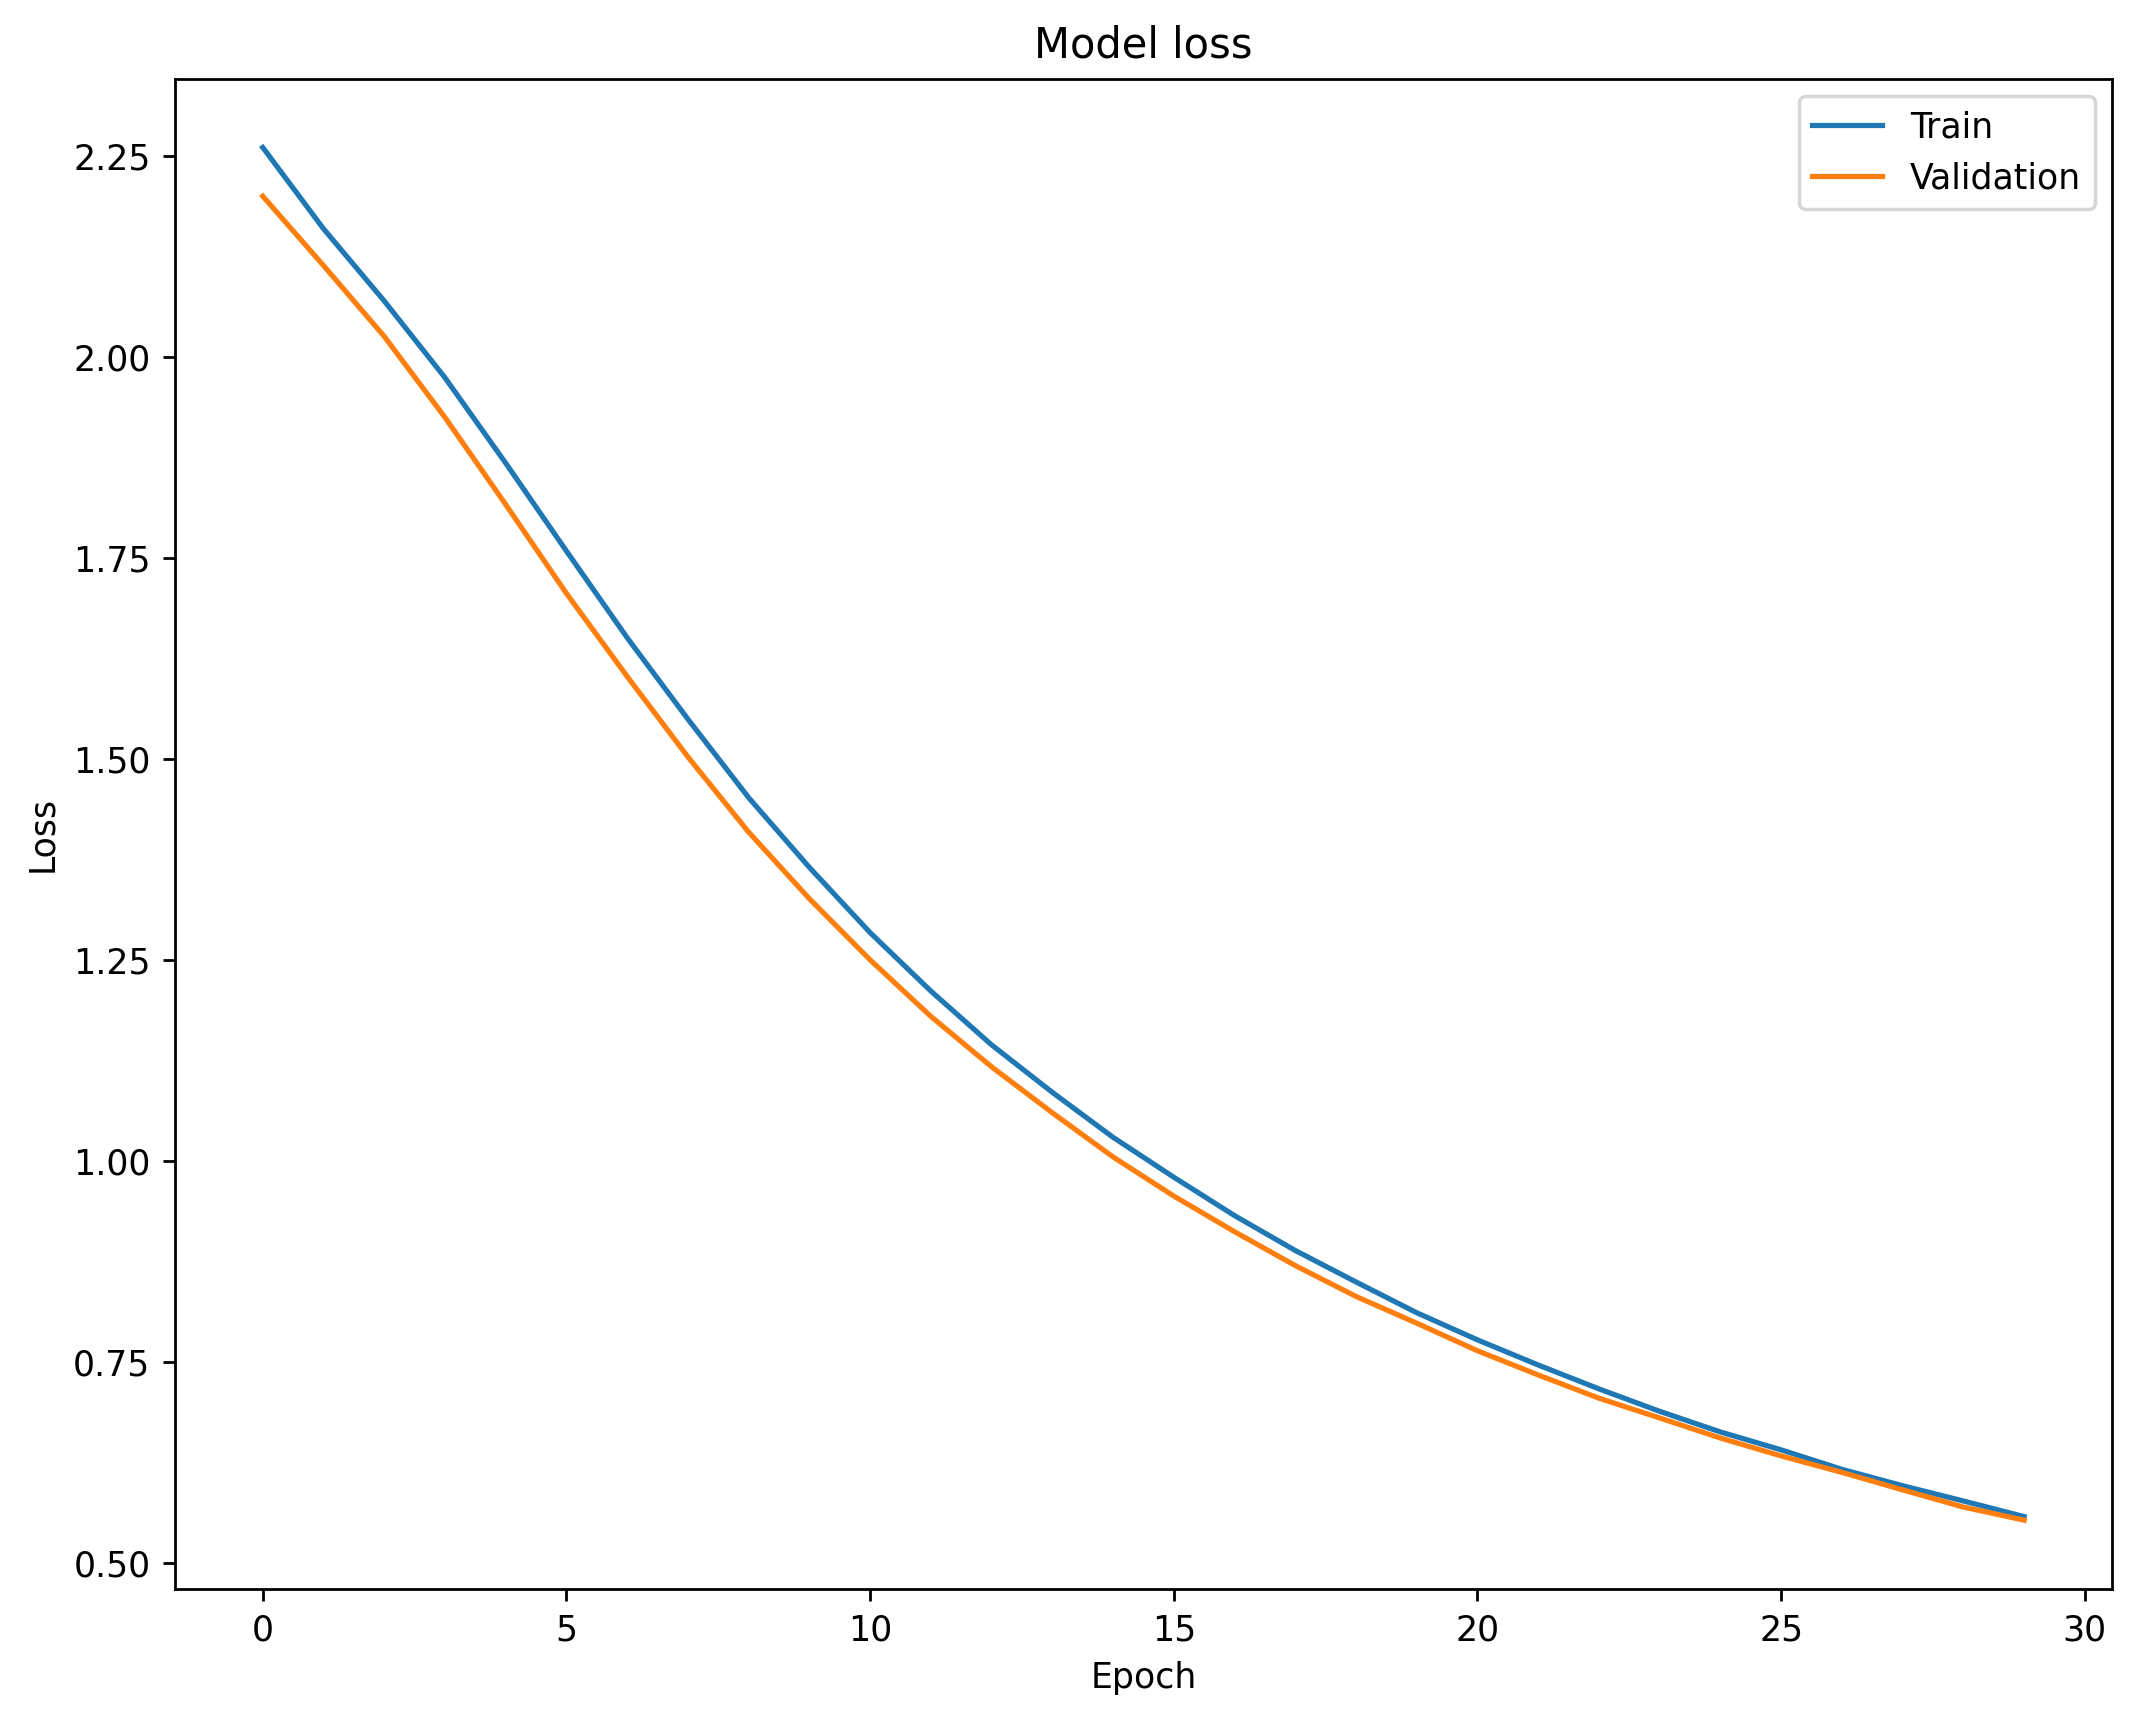

In [11]:
# Summarize history for accuracy
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_accuracy)
plt.plot(mean_val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(NAME + '_Accuracy.png')
plt.show()

# Summarize history for loss
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_loss)
plt.plot(mean_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig(NAME + '_Loss.png')
plt.show()

It is observed that both the accuracy and loss graphs have room for further improvement, so it is decided to increase the number of epochs.

## **Experiment 2**

Name: 002-Poses-34-10

Learning Rate: 0.3

Epochs: 100

Architecture: 34D-10D

In [12]:
LEARNING_RATE = 0.3
EPOCHS = 100
NUM_FOLDS = 10
VERBOSITY = False
NAME = '002-Poses-34-10'

# Define the K-fold Cross Validator
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
result = []

# Define structures for storing results in the graphs
graph_data_accuracy = []
graph_data_val_accuracy = []
graph_data_loss = []
graph_data_val_loss = []

for cv_train, cv_validation in kfold.split(x_train, y_train):
  
  ''' 
  Neural network structure: 34 inputs and x neurons at the output layer for x classes
  The hidden layer uses a rectifier activation function which is a good practice
  Softmax function at the output layer is used for the multiclass
  '''
  # Neural network structure
  model = Sequential()
  model.add(Dense(34, input_dim=34, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  '''
  Efficient Adam gradient descent optimization algorithm
  Logarithmic loss function, categorical_crossentropy
  '''
  # Model creation
  adam_optimizer = keras.optimizers.Adam(lr= LEARNING_RATE)
  model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Training
  history = model.fit(x_train.iloc[cv_train], y_train[cv_train], epochs=EPOCHS, validation_data=(x_train.iloc[cv_validation], y_train[cv_validation]), verbose=VERBOSITY)

  aux_accuracy, aux_val_accuracy, aux_loss, aux_val_loss = create_graph_structures(history)
  graph_data_accuracy.append(aux_accuracy)
  graph_data_val_accuracy.append(aux_val_accuracy)
  graph_data_loss.append(aux_loss)
  graph_data_val_loss.append(aux_val_loss)

  # Generate generalization metrics
  scores = model.evaluate(x_train.iloc[cv_validation], y_train[cv_validation], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  result.append(scores[1])

  # Fold number
  fold_no = fold_no + 1

# Metrics for graphs
mean_accuracy, mean_val_accuracy, mean_loss, mean_val_loss = calculate_means (graph_data_accuracy, graph_data_val_accuracy, graph_data_loss, graph_data_val_loss, EPOCHS)

# Print mean accuracy for the experiment
experiments.append(statistics.mean(result))
print(f'Accuracy K-Fold: {statistics.mean(result)*100}%')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.16666236519813538; accuracy of 97.23502397537231%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.15920200943946838; accuracy of 97.69585132598877%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.12196152657270432; accuracy of 97.69585132598877%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.14742060005664825; accuracy of 98.1566846370697%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.15462125837802887; accuracy of 97.23502397537231%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.2

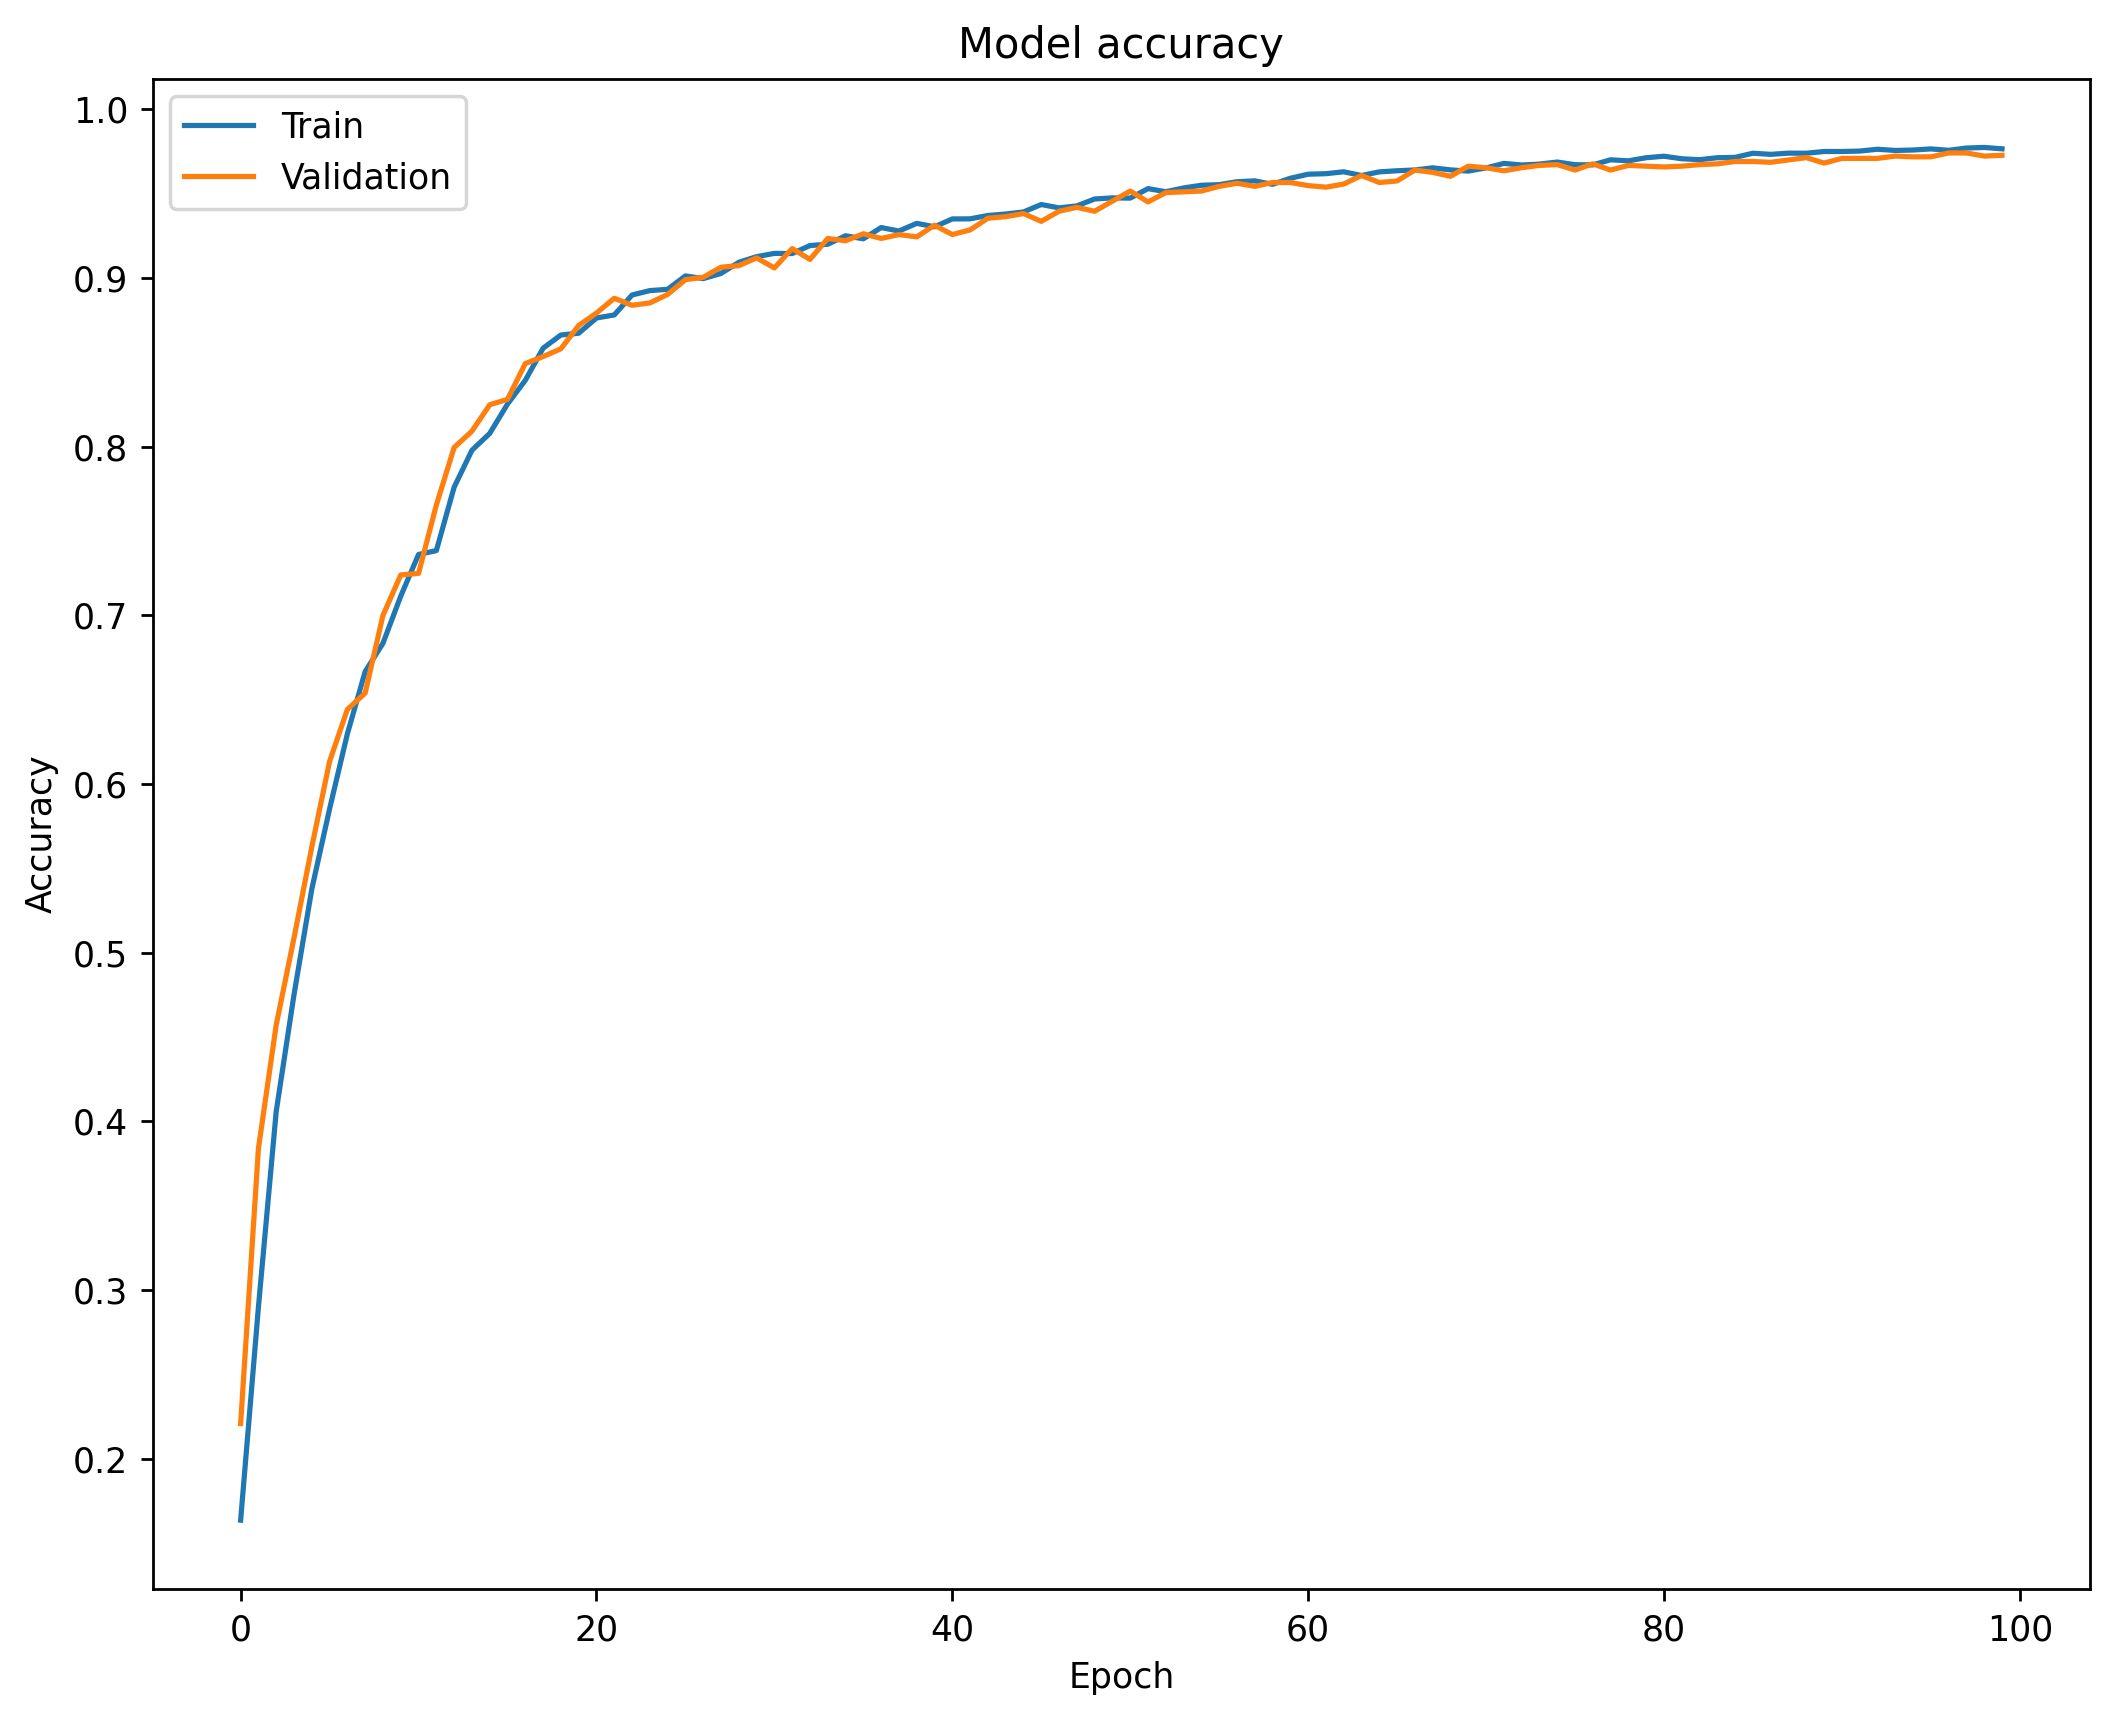

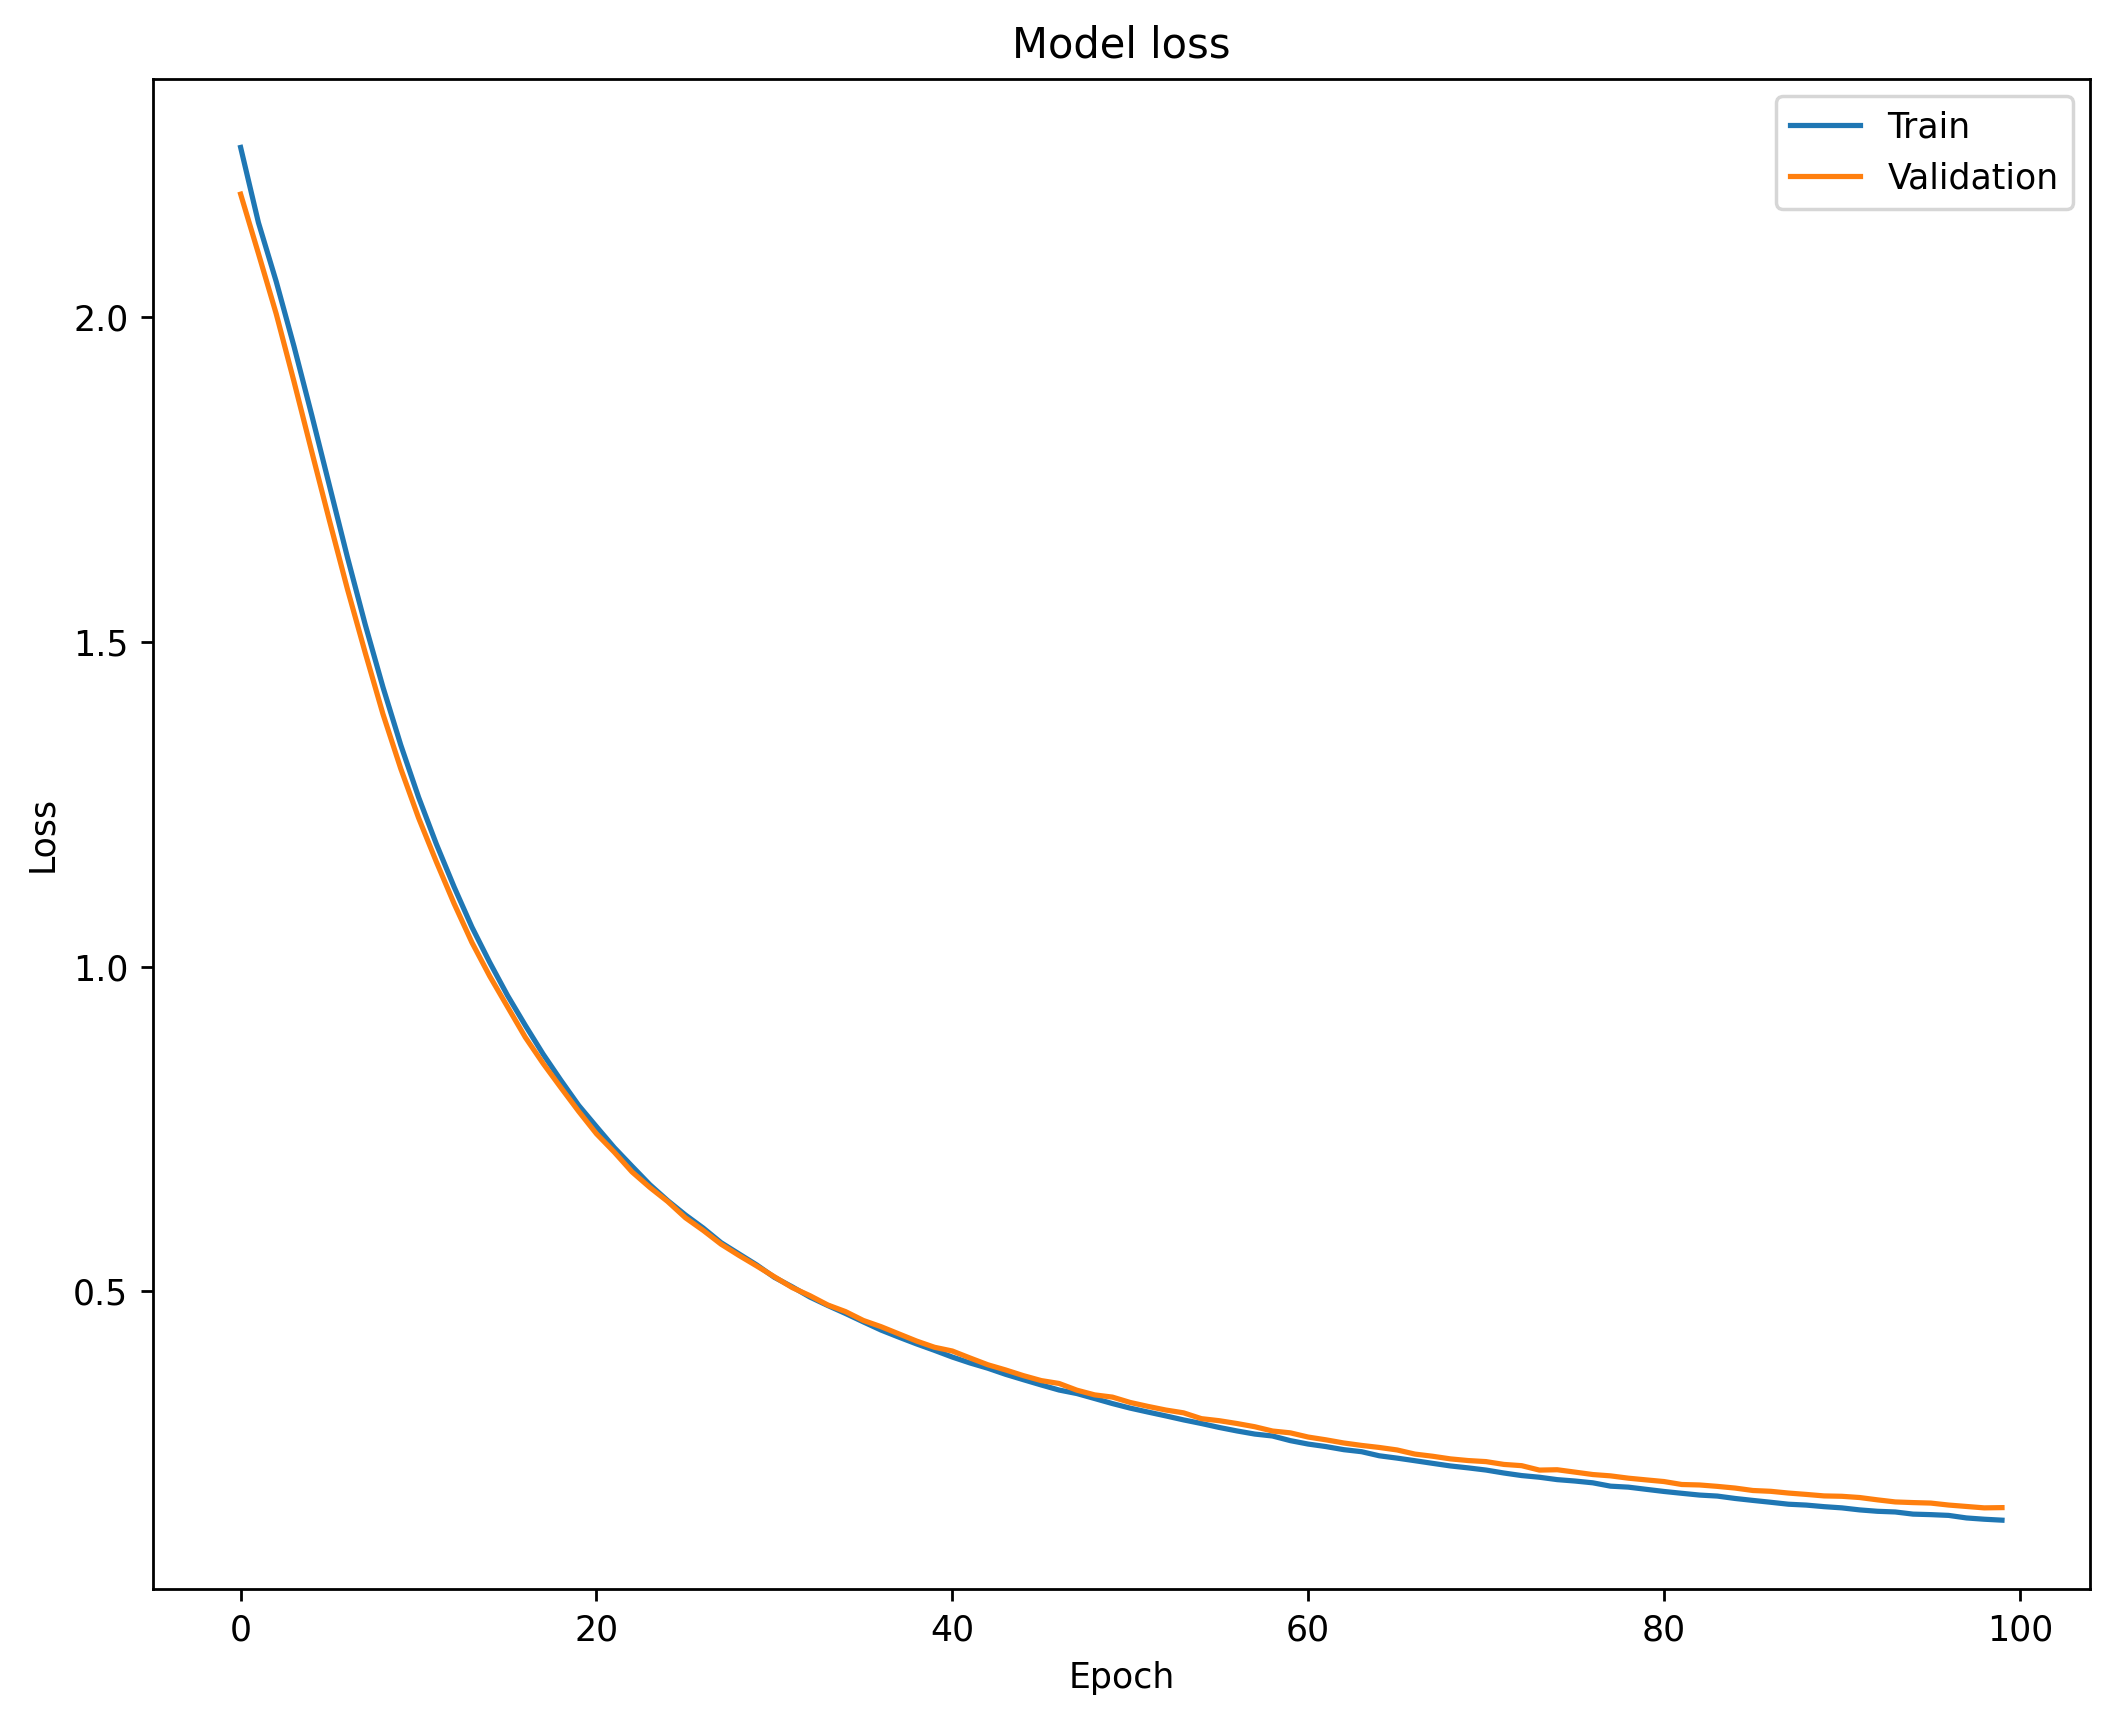

In [13]:
# Summarize history for accuracy
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_accuracy)
plt.plot(mean_val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(NAME + '_Accuracy.png')
plt.show()

# Summarize history for loss
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_loss)
plt.plot(mean_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig(NAME + '_Loss.png')
plt.show()

It can be seen that there is still room for improvement, so in the next test the number of layers in the network is increased to see if further improvement is possible.

## **Experiment 3**

Name: 003-Poses-34-20-10

Learning Rate: 0.3

Epochs: 100

Architecture: 34D-20D-10D

In [14]:
LEARNING_RATE = 0.3
EPOCHS = 100
NUM_FOLDS = 10
VERBOSITY = False
NAME = '003-Poses-34-20-10'

# Define the K-fold Cross Validator
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
result = []

# Define structures for storing results in the graphs
graph_data_accuracy = []
graph_data_val_accuracy = []
graph_data_loss = []
graph_data_val_loss = []

for cv_train, cv_validation in kfold.split(x_train, y_train):
  
  ''' 
  Neural network structure: 34 inputs and x neurons at the output layer for x classes
  The hidden layer uses a rectifier activation function which is a good practice
  Softmax function at the output layer is used for the multiclass
  '''
  # Neural network structure
  model = Sequential()
  model.add(Dense(34, input_dim=34, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  '''
  Efficient Adam gradient descent optimization algorithm
  Logarithmic loss function, categorical_crossentropy
  '''
  # Model creation
  adam_optimizer = keras.optimizers.Adam(lr= LEARNING_RATE)
  model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Training
  history = model.fit(x_train.iloc[cv_train], y_train[cv_train], epochs=EPOCHS, validation_data=(x_train.iloc[cv_validation], y_train[cv_validation]), verbose=VERBOSITY)

  aux_accuracy, aux_val_accuracy, aux_loss, aux_val_loss = create_graph_structures(history)
  graph_data_accuracy.append(aux_accuracy)
  graph_data_val_accuracy.append(aux_val_accuracy)
  graph_data_loss.append(aux_loss)
  graph_data_val_loss.append(aux_val_loss)

  # Generate generalization metrics
  scores = model.evaluate(x_train.iloc[cv_validation], y_train[cv_validation], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  result.append(scores[1])

  # Fold number
  fold_no = fold_no + 1

# Metrics for graphs
mean_accuracy, mean_val_accuracy, mean_loss, mean_val_loss = calculate_means (graph_data_accuracy, graph_data_val_accuracy, graph_data_loss, graph_data_val_loss, EPOCHS)

# Print mean accuracy for the experiment
experiments.append(statistics.mean(result))
print(f'Accuracy K-Fold: {statistics.mean(result)*100}%')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.1991598904132843; accuracy of 96.77419066429138%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.10918669402599335; accuracy of 97.23502397537231%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.030995884910225868; accuracy of 99.53917264938354%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.10683253407478333; accuracy of 98.61751198768616%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.17747177183628082; accuracy of 99.07833933830261%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.

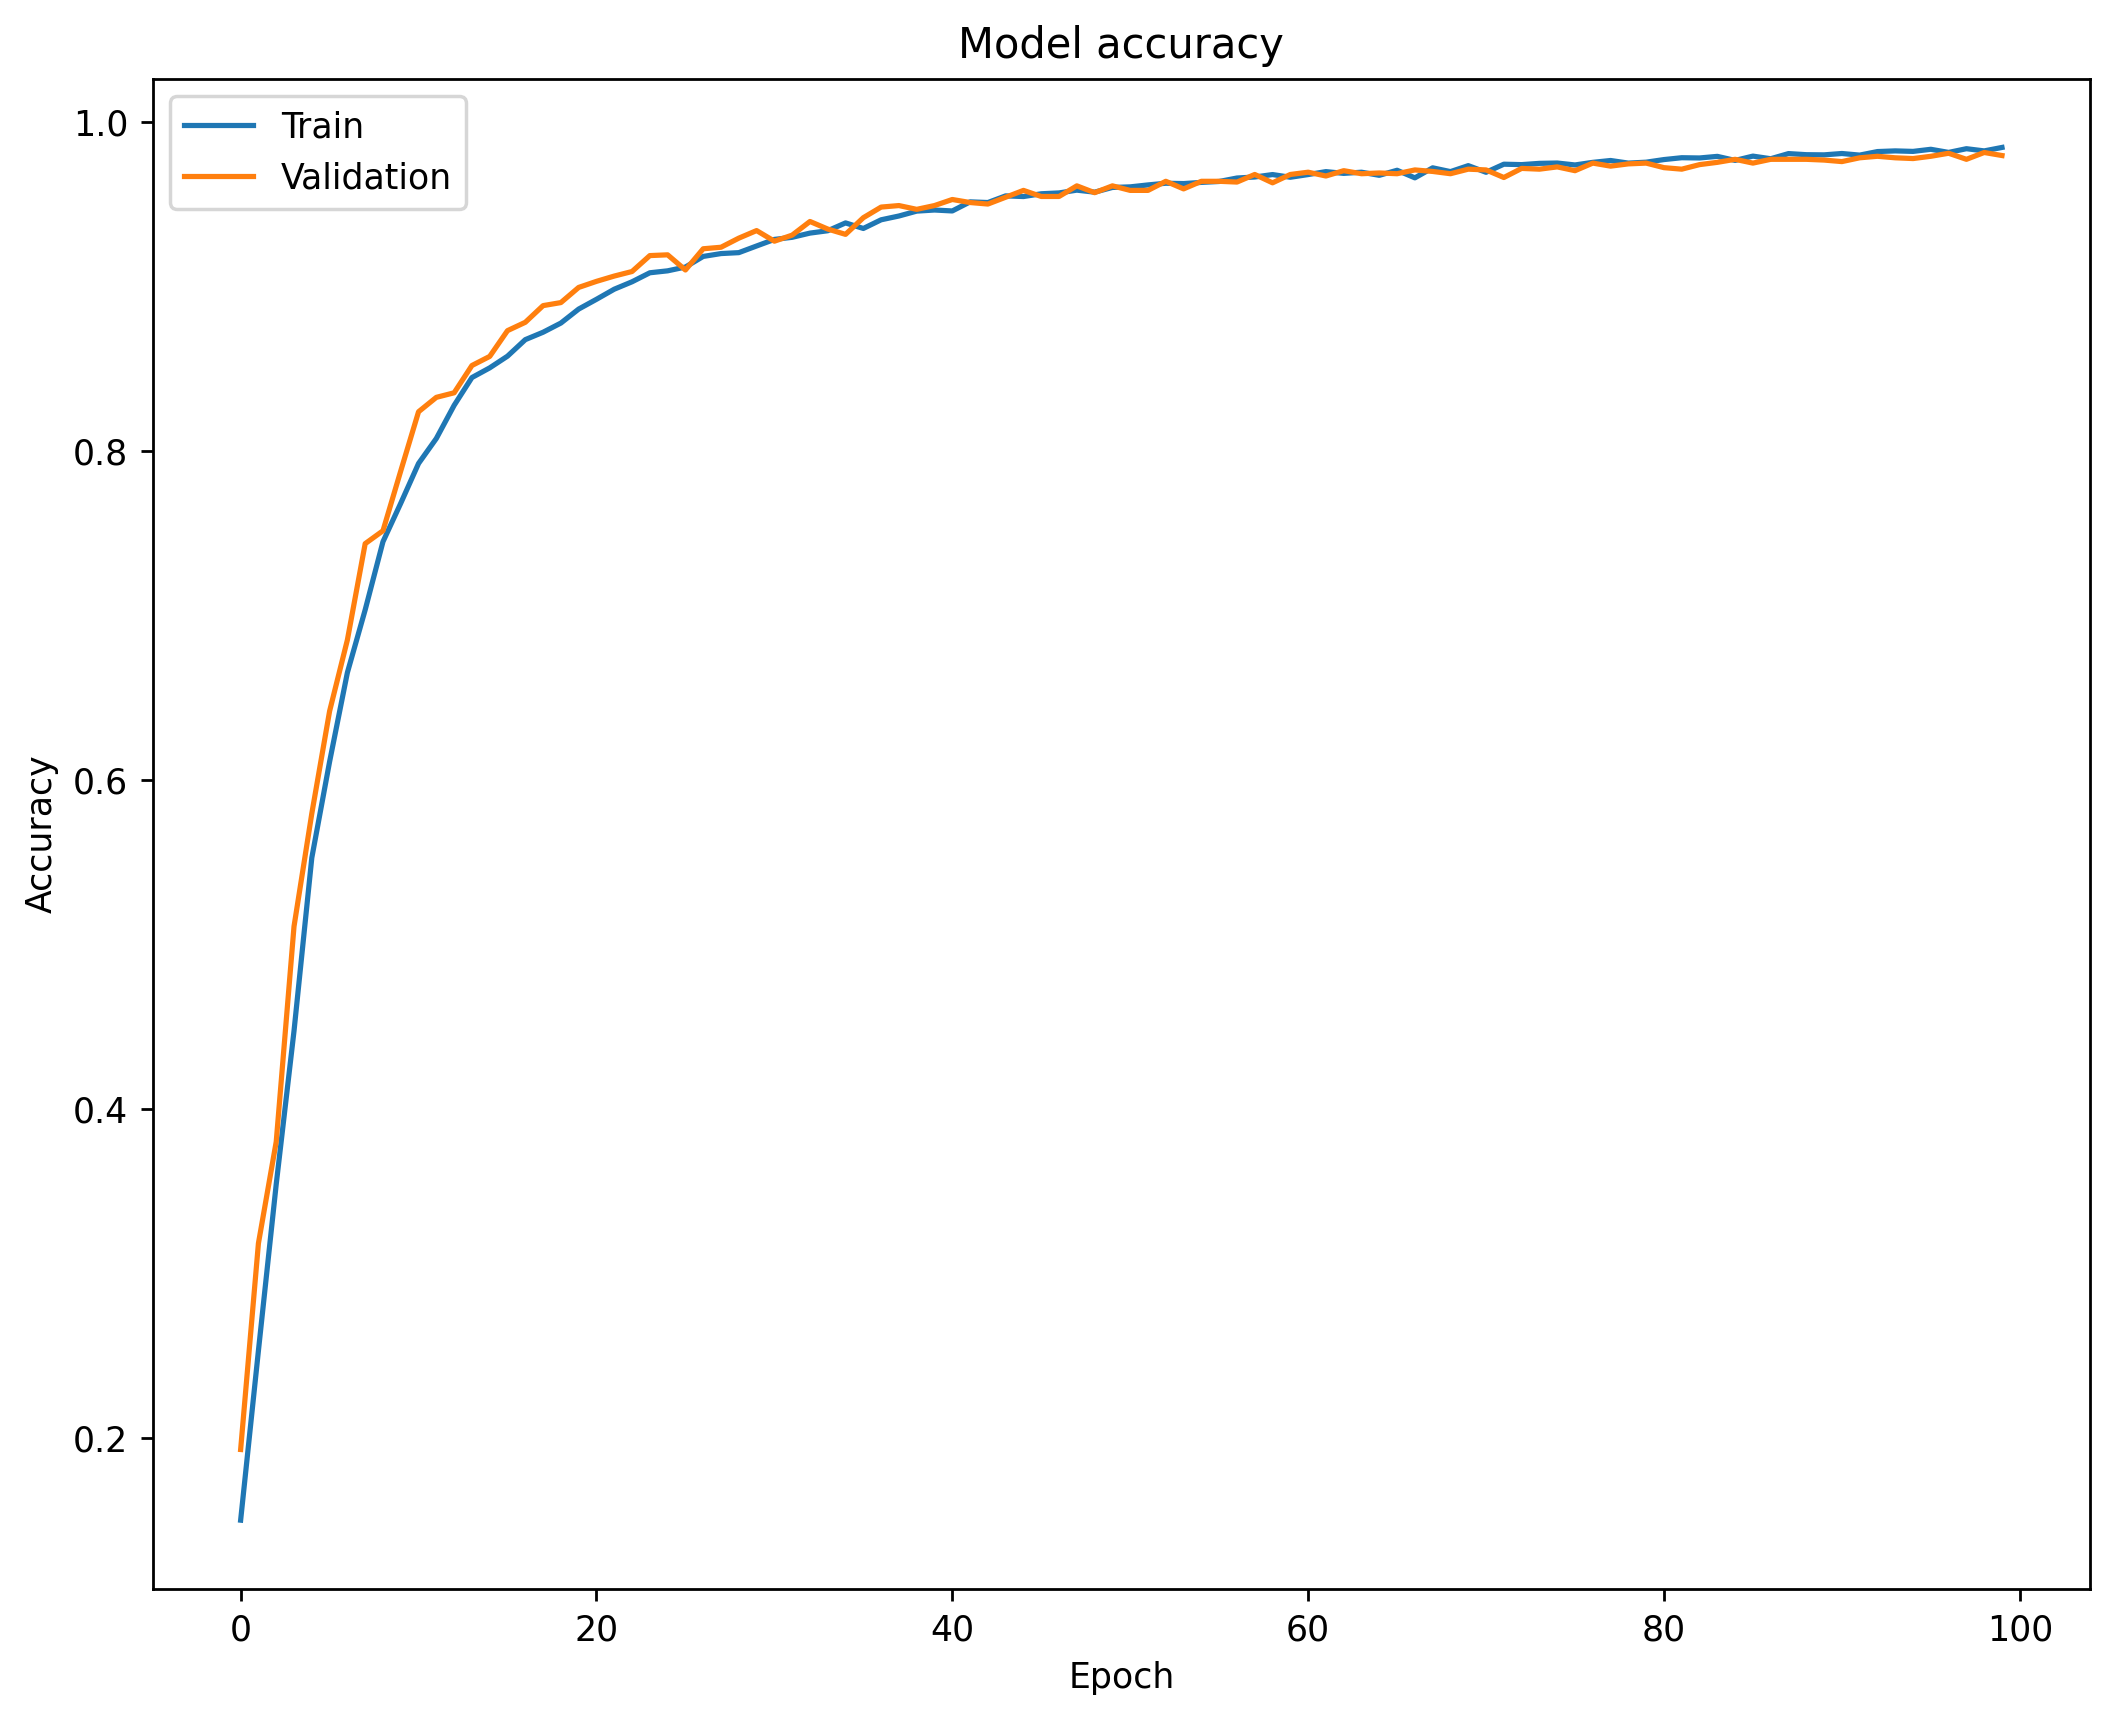

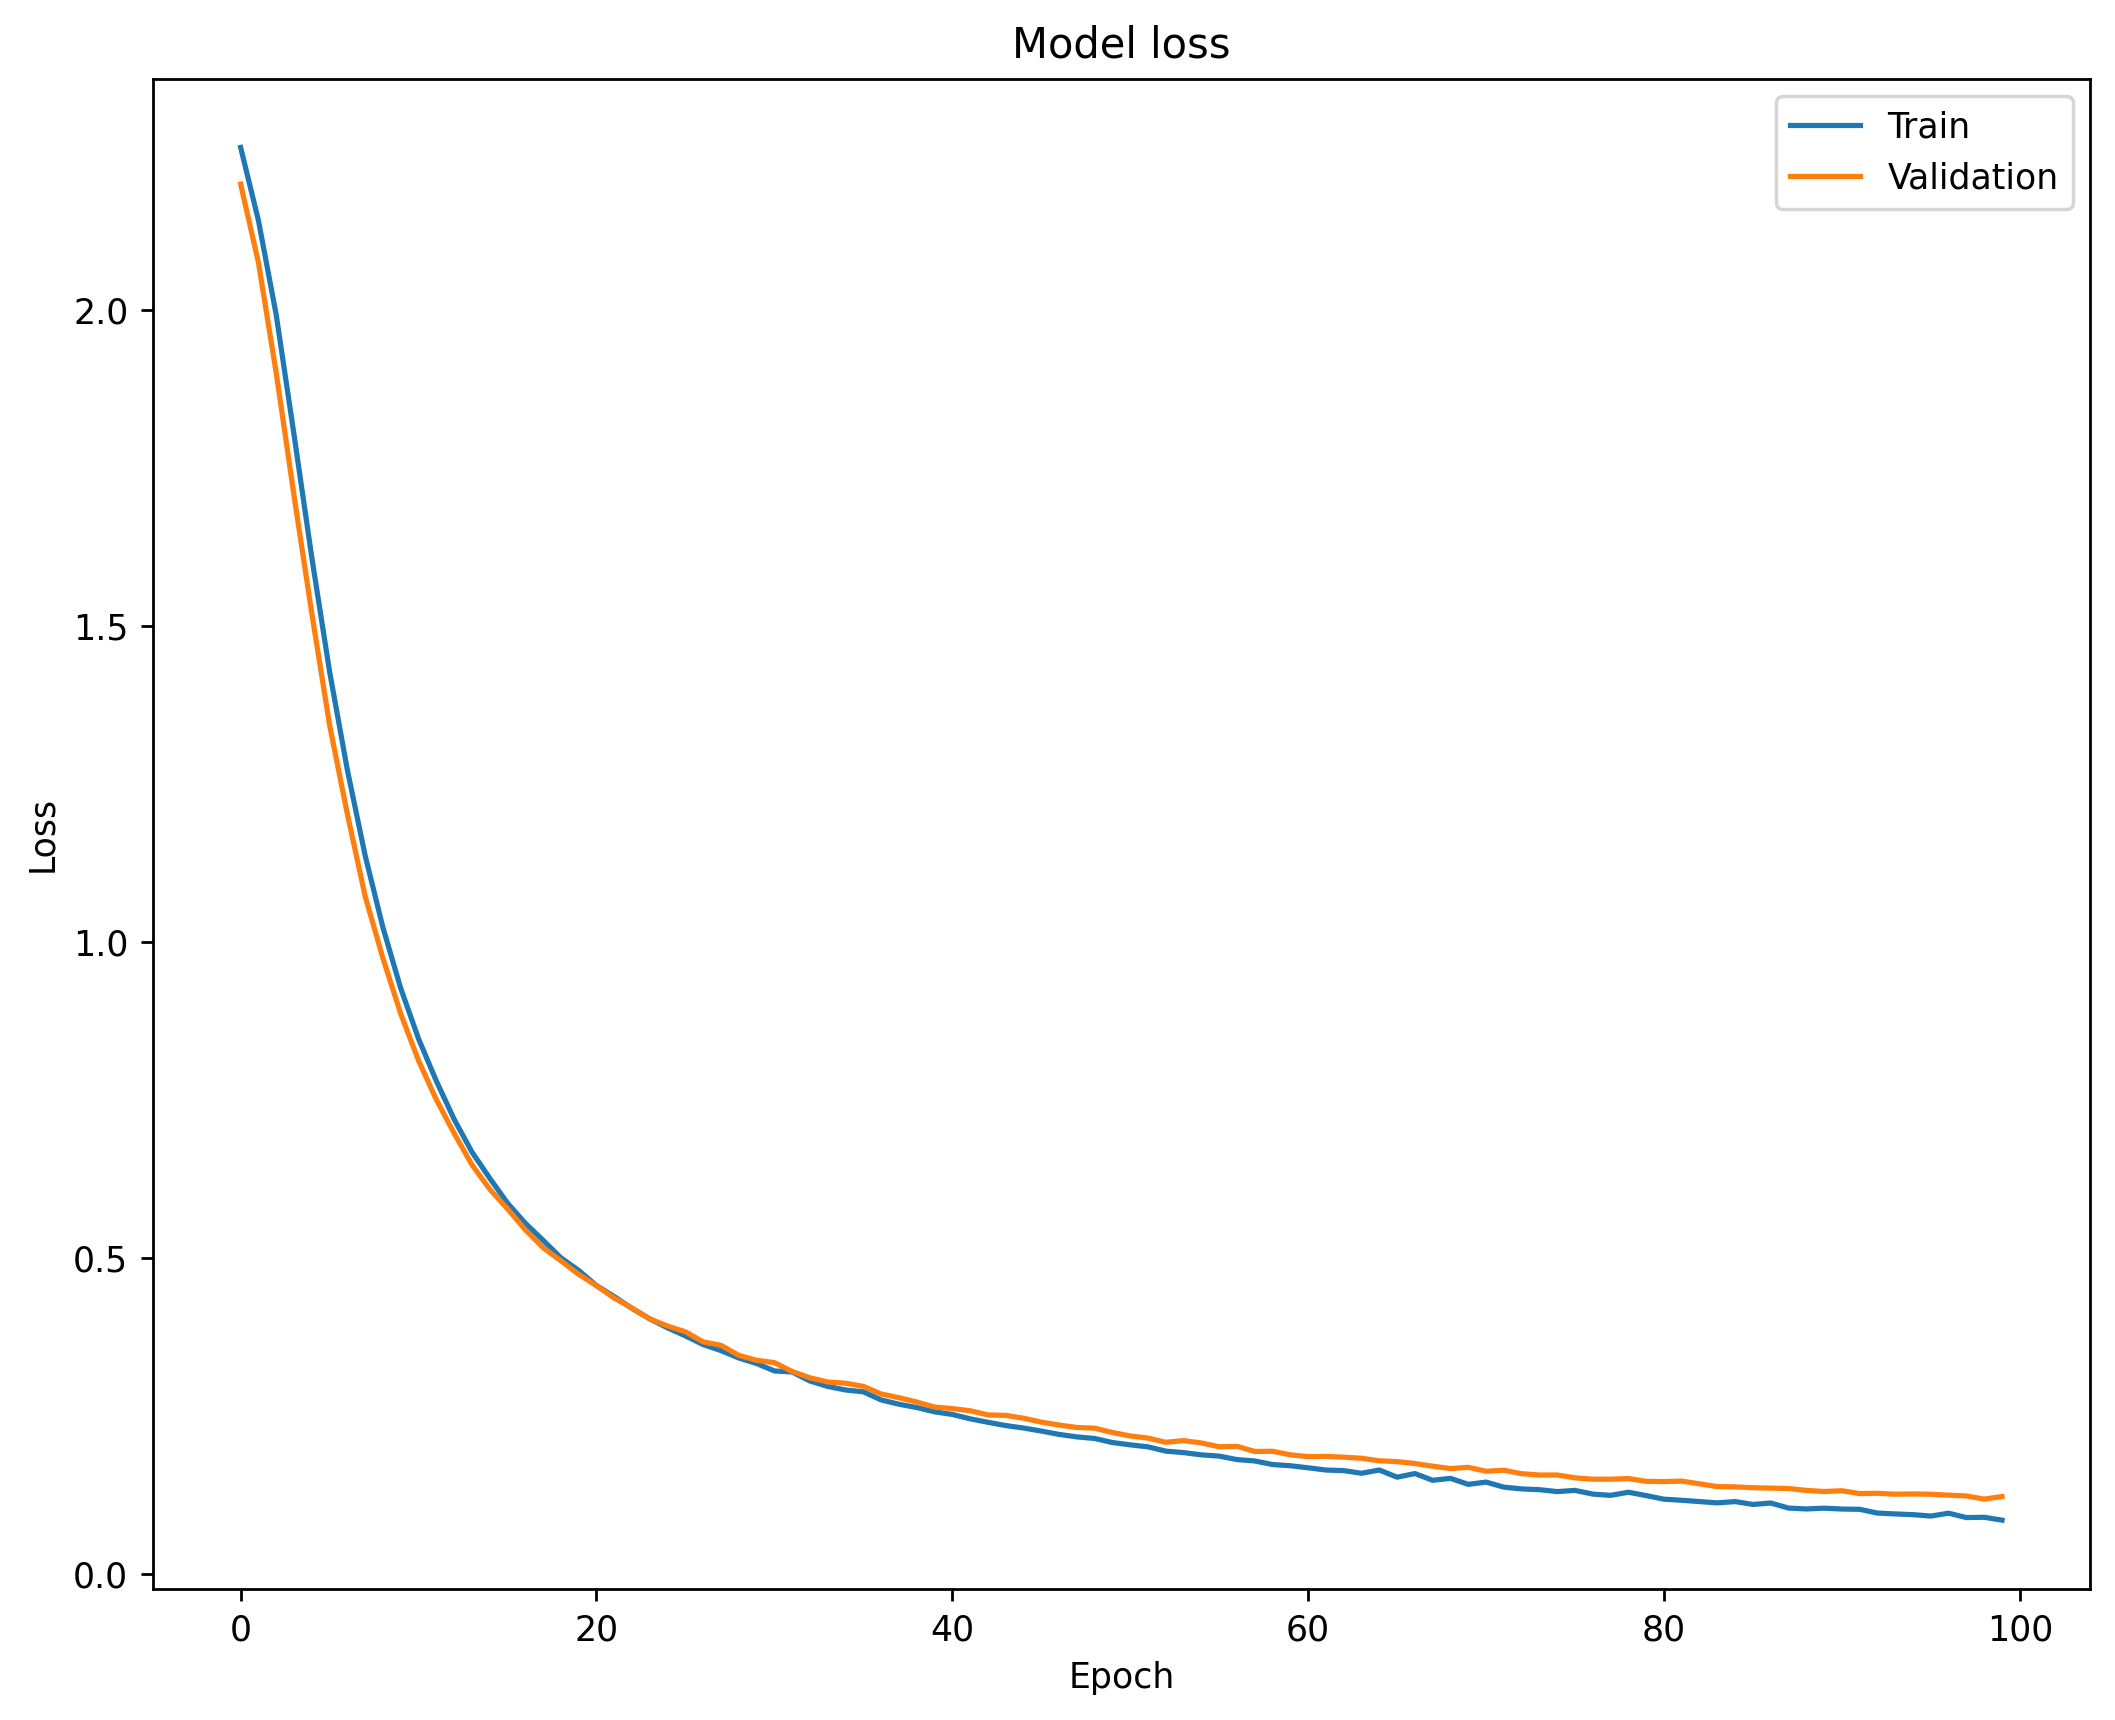

In [15]:
# Summarize history for accuracy
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_accuracy)
plt.plot(mean_val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(NAME + '_Accuracy.png')
plt.show()

# Summarize history for loss
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_loss)
plt.plot(mean_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig(NAME + '_Loss.png')
plt.show()

As there is still limited room for improvement of the parameters, the number of epochs is increased to 200 in order to check on the graphs which value is appropriate

## **Experiment 4**

Name: 004-Poses-34-20-10

Learning Rate: 0.3

Epochs: 200

Architecture: 34D-20D-10D

In [16]:
LEARNING_RATE = 0.3
EPOCHS = 200
NUM_FOLDS = 10
VERBOSITY = False
NAME = '004-Poses-34-20-10'

# Define the K-fold Cross Validator
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
result = []

# Define structures for storing results in the graphs
graph_data_accuracy = []
graph_data_val_accuracy = []
graph_data_loss = []
graph_data_val_loss = []

for cv_train, cv_validation in kfold.split(x_train, y_train):
  
  ''' 
  Neural network structure: 34 inputs and x neurons at the output layer for x classes
  The hidden layer uses a rectifier activation function which is a good practice
  Softmax function at the output layer is used for the multiclass
  '''
  # Neural network structure
  model = Sequential()
  model.add(Dense(34, input_dim=34, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  '''
  Efficient Adam gradient descent optimization algorithm
  Logarithmic loss function, categorical_crossentropy
  '''
  # Model creation
  adam_optimizer = keras.optimizers.Adam(lr= LEARNING_RATE)
  model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Training
  history = model.fit(x_train.iloc[cv_train], y_train[cv_train], epochs=EPOCHS, validation_data=(x_train.iloc[cv_validation], y_train[cv_validation]), verbose=VERBOSITY)

  aux_accuracy, aux_val_accuracy, aux_loss, aux_val_loss = create_graph_structures(history)
  graph_data_accuracy.append(aux_accuracy)
  graph_data_val_accuracy.append(aux_val_accuracy)
  graph_data_loss.append(aux_loss)
  graph_data_val_loss.append(aux_val_loss)

  # Generate generalization metrics
  scores = model.evaluate(x_train.iloc[cv_validation], y_train[cv_validation], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  result.append(scores[1])

  # Fold number
  fold_no = fold_no + 1

# Metrics for graphs
mean_accuracy, mean_val_accuracy, mean_loss, mean_val_loss = calculate_means (graph_data_accuracy, graph_data_val_accuracy, graph_data_loss, graph_data_val_loss, EPOCHS)

# Print mean accuracy for the experiment
experiments.append(statistics.mean(result))
print(f'Accuracy K-Fold: {statistics.mean(result)*100}%')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.03626621142029762; accuracy of 98.1566846370697%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.008383721113204956; accuracy of 100.0%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.1472853124141693; accuracy of 98.61751198768616%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.04190723970532417; accuracy of 99.53917264938354%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.03778855875134468; accuracy of 98.61751198768616%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.0229359753429

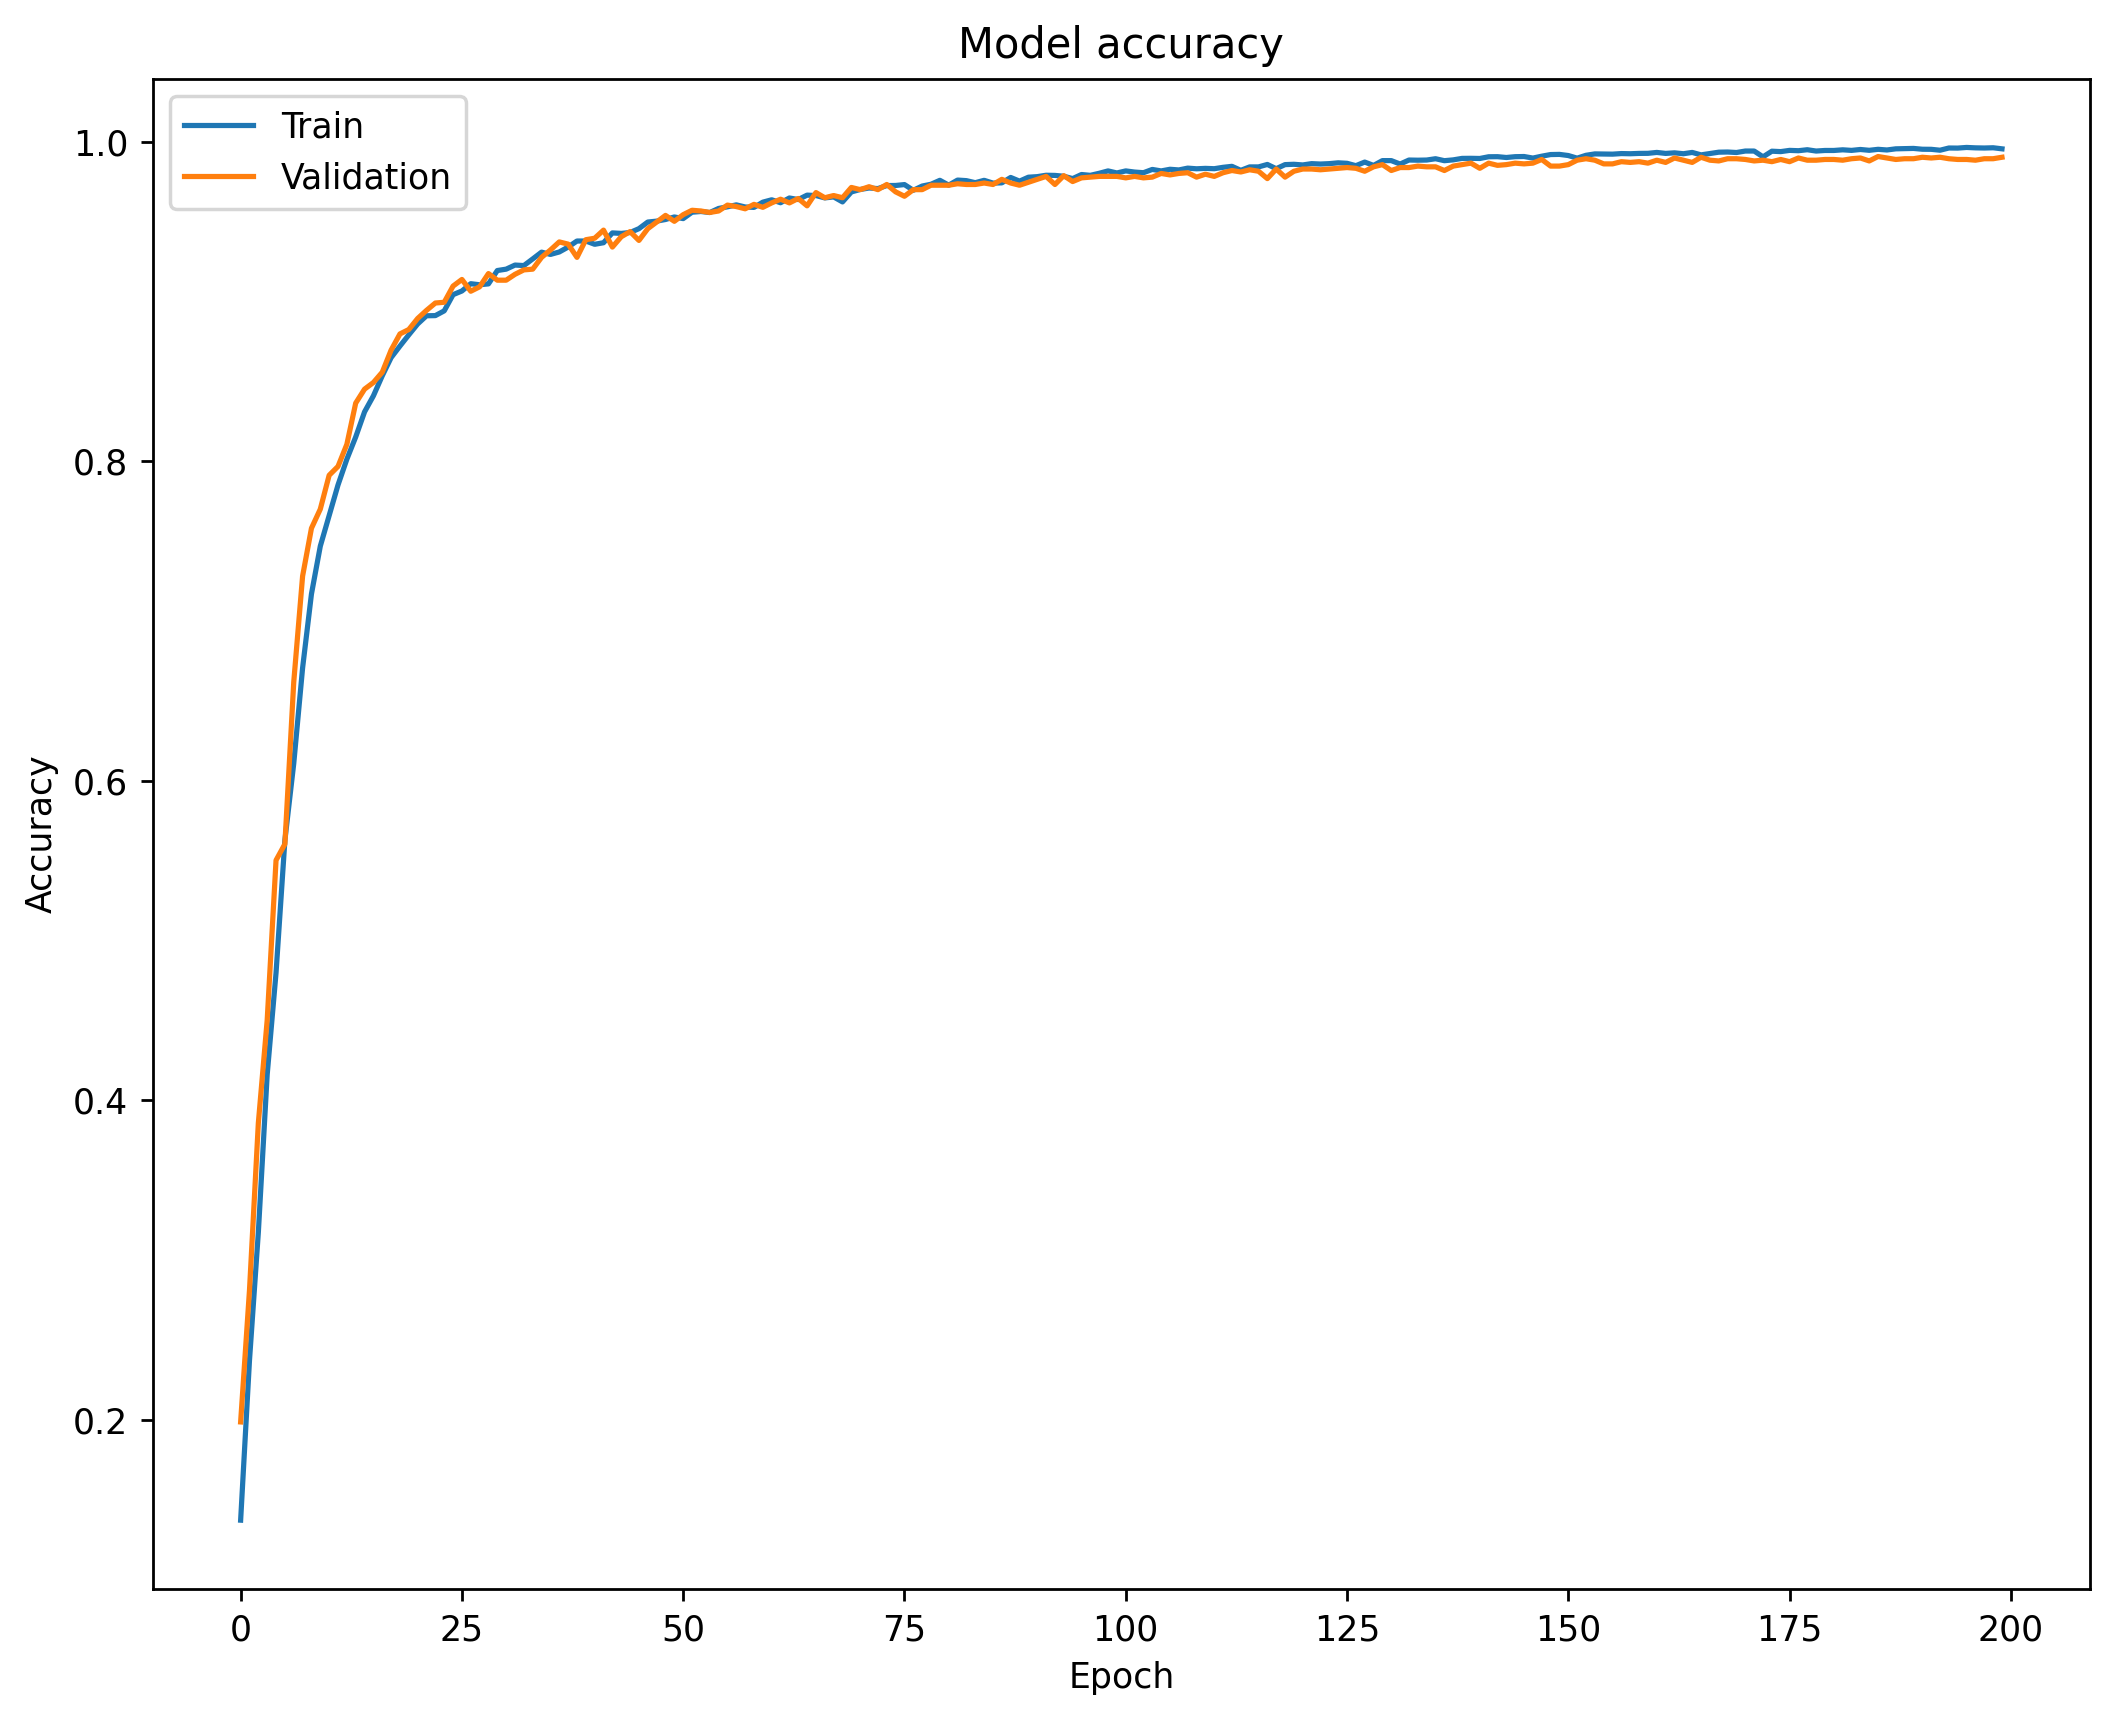

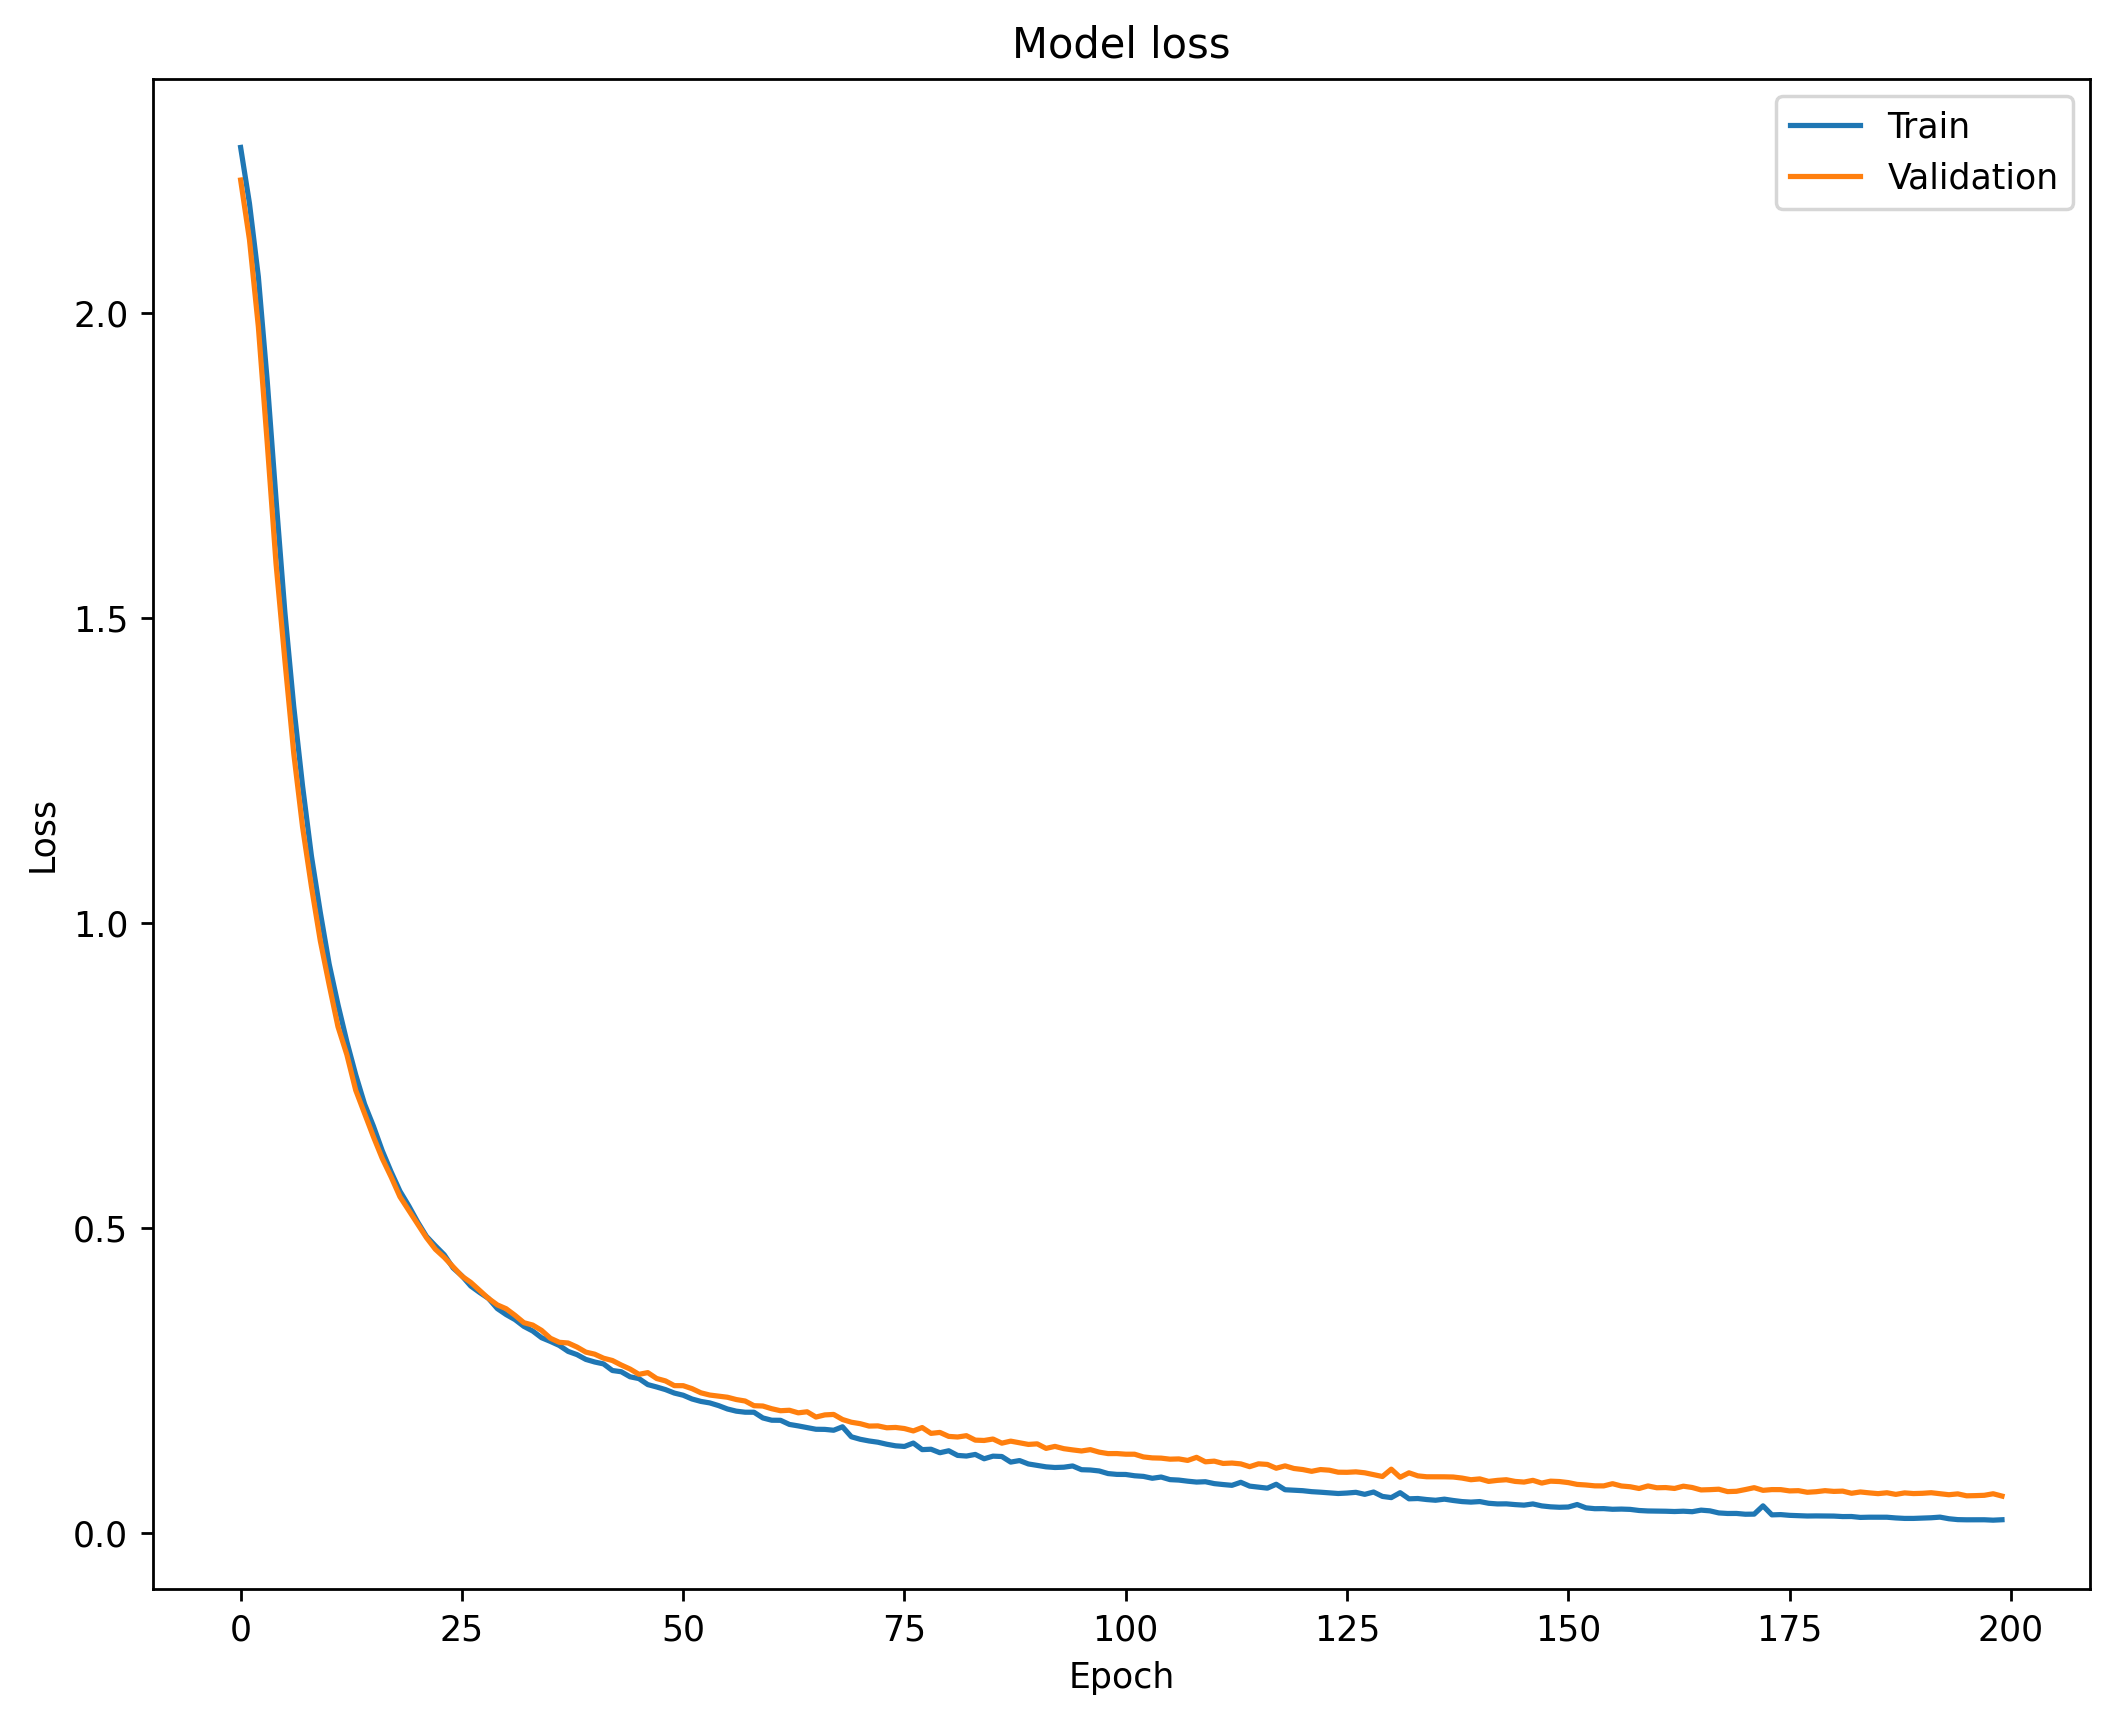

In [17]:
# Summarize history for accuracy
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_accuracy)
plt.plot(mean_val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(NAME + '_Accuracy.png')
plt.show()

# Summarize history for loss
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_loss)
plt.plot(mean_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig(NAME + '_Loss.png')
plt.show()

It is determined that from epoch 125 onwards there is no palpable improvement of the model and therefore it is set as the final number of epochs.  The learning rate is not modified as it presents a compromise value between speed and results obtained.

## **Final model**

Name: 005-Poses-34-20-10

Learning Rate: 0.3

Epochs: 125

Architecture: 34D-20D-10D

In [18]:
LEARNING_RATE = 0.3
EPOCHS = 125
NUM_FOLDS = 10
VERBOSITY = True
NAME = '005-Poses-34-20-10'

# Define the K-fold Cross Validator
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
result = []

# Define structures for storing results in the graphs
graph_data_accuracy = []
graph_data_val_accuracy = []
graph_data_loss = []
graph_data_val_loss = []

for cv_train, cv_validation in kfold.split(x_train, y_train):
  
  ''' 
  Neural network structure: 34 inputs and x neurons at the output layer for x classes
  The hidden layer uses a rectifier activation function which is a good practice
  Softmax function at the output layer is used for the multiclass
  '''
  # Neural network structure
  model_final = Sequential()
  model_final.add(Dense(34, input_dim=34, activation='relu'))
  model_final.add(Dense(20, activation='relu'))
  model_final.add(Dense(10, activation='softmax'))

  '''
  Efficient Adam gradient descent optimization algorithm
  Logarithmic loss function, categorical_crossentropy
  '''
  # Model creation
  adam_optimizer = keras.optimizers.Adam(lr= LEARNING_RATE)
  model_final.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Training
  history = model_final.fit(x_train.iloc[cv_train], y_train[cv_train], epochs=EPOCHS, validation_data=(x_train.iloc[cv_validation], y_train[cv_validation]), verbose=VERBOSITY)

  aux_accuracy, aux_val_accuracy, aux_loss, aux_val_loss = create_graph_structures(history)
  graph_data_accuracy.append(aux_accuracy)
  graph_data_val_accuracy.append(aux_val_accuracy)
  graph_data_loss.append(aux_loss)
  graph_data_val_loss.append(aux_val_loss)

  # Generate generalization metrics
  scores = model_final.evaluate(x_train.iloc[cv_validation], y_train[cv_validation], verbose=0)
  print(f'Score for fold {fold_no}: {model_final.metrics_names[0]} of {scores[0]}; {model_final.metrics_names[1]} of {scores[1]*100}%')
  result.append(scores[1])

  # Fold number
  fold_no = fold_no + 1

# Metrics for graphs
mean_accuracy, mean_val_accuracy, mean_loss, mean_val_loss = calculate_means (graph_data_accuracy, graph_data_val_accuracy, graph_data_loss, graph_data_val_loss, EPOCHS)

# Print mean accuracy for the experiment
experiments.append(statistics.mean(result))
print(f'Accuracy K-Fold: {statistics.mean(result)*100}%')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/125
62/62 [==============================] - 1s 6ms/step - loss: 2.2673 - accuracy: 0.1398 - val_loss: 2.1586 - val_accuracy: 0.3502
Epoch 2/125
62/62 [==============================] - 0s 2ms/step - loss: 2.1034 - accuracy: 0.4280 - val_loss: 2.0058 - val_accuracy: 0.4470
Epoch 3/125
62/62 [==============================] - 0s 2ms/step - loss: 1.9237 - accuracy: 0.5005 - val_loss: 1.8023 - val_accuracy: 0.5853
Epoch 4/125
62/62 [==============================] - 0s 2ms/step - loss: 1.7246 - accuracy: 0.5860 - val_loss: 1.5828 - val_accuracy: 0.6406
Epoch 5/125
62/62 [==============================] - 0s 2ms/step - loss: 1.5136 - accuracy: 0.6235 - val_loss: 1.3982 - val_accuracy: 0.6636
Epoch 6/125
62/62 [==============================] - 0s 2ms/step - loss: 1.3284 - accuracy: 0.7345 - val_loss: 1.2398 - val_accuracy: 0.7143
Epoch 7/125
62/62 [==============================] - 0s 2

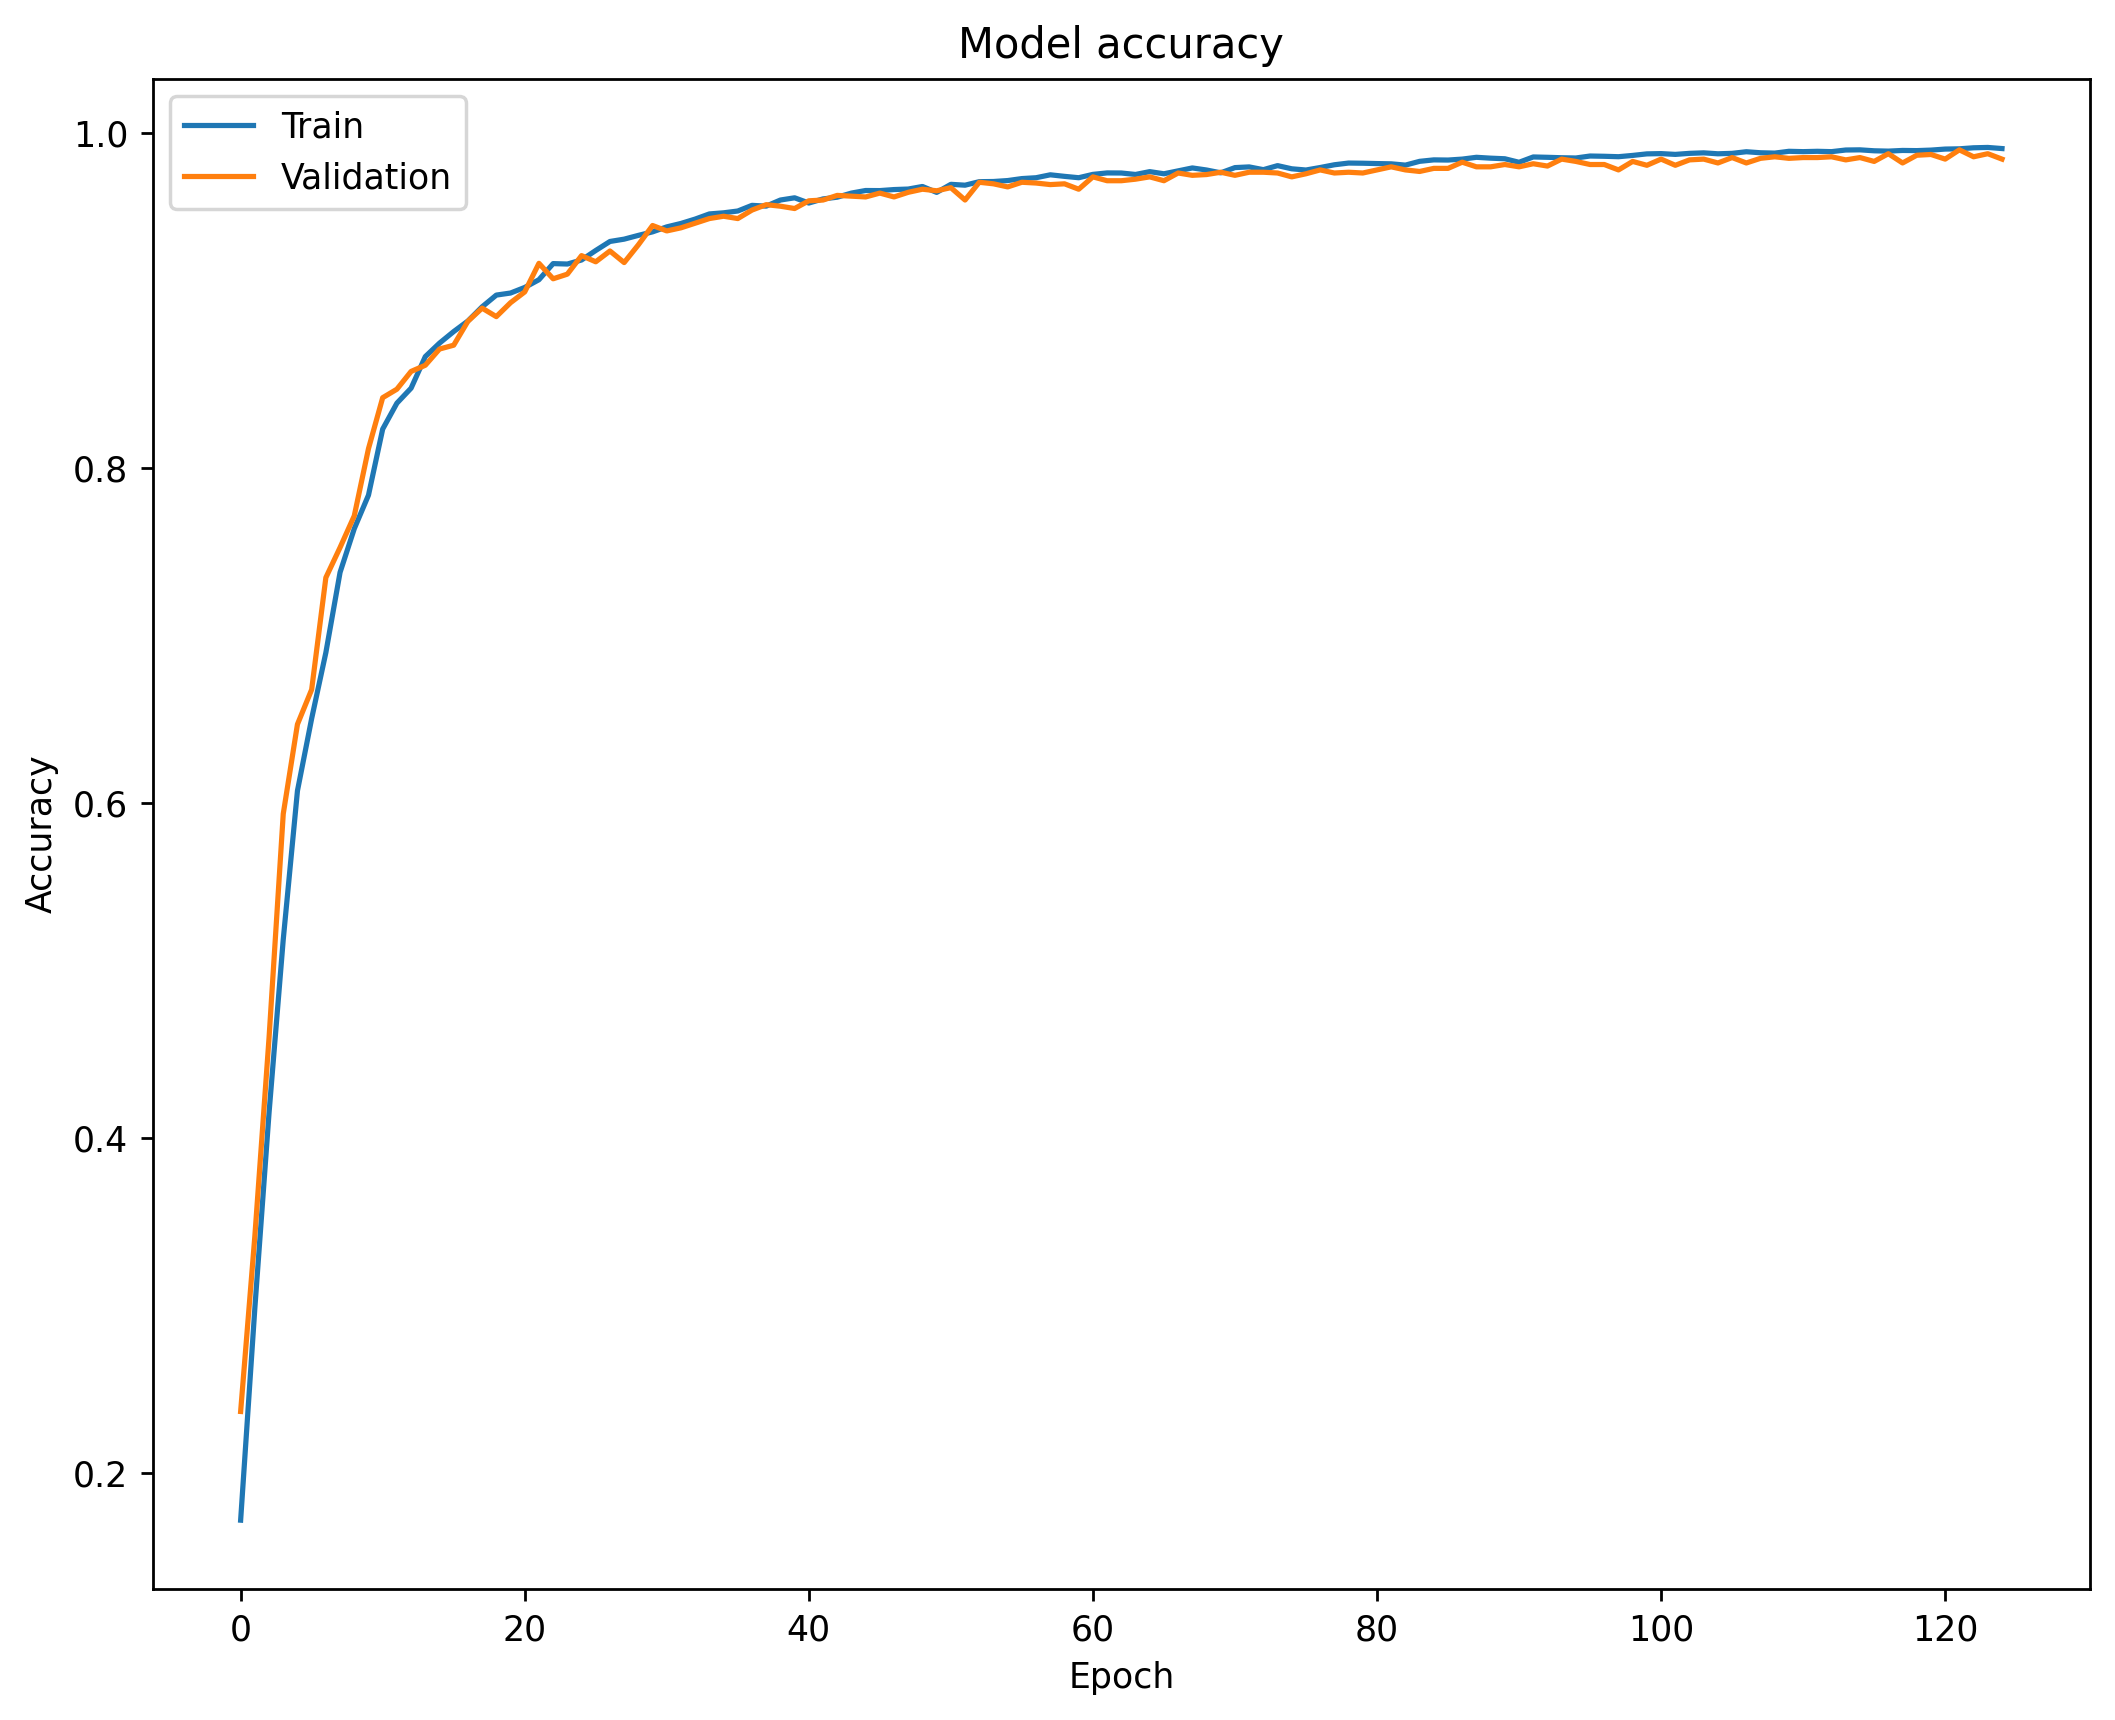

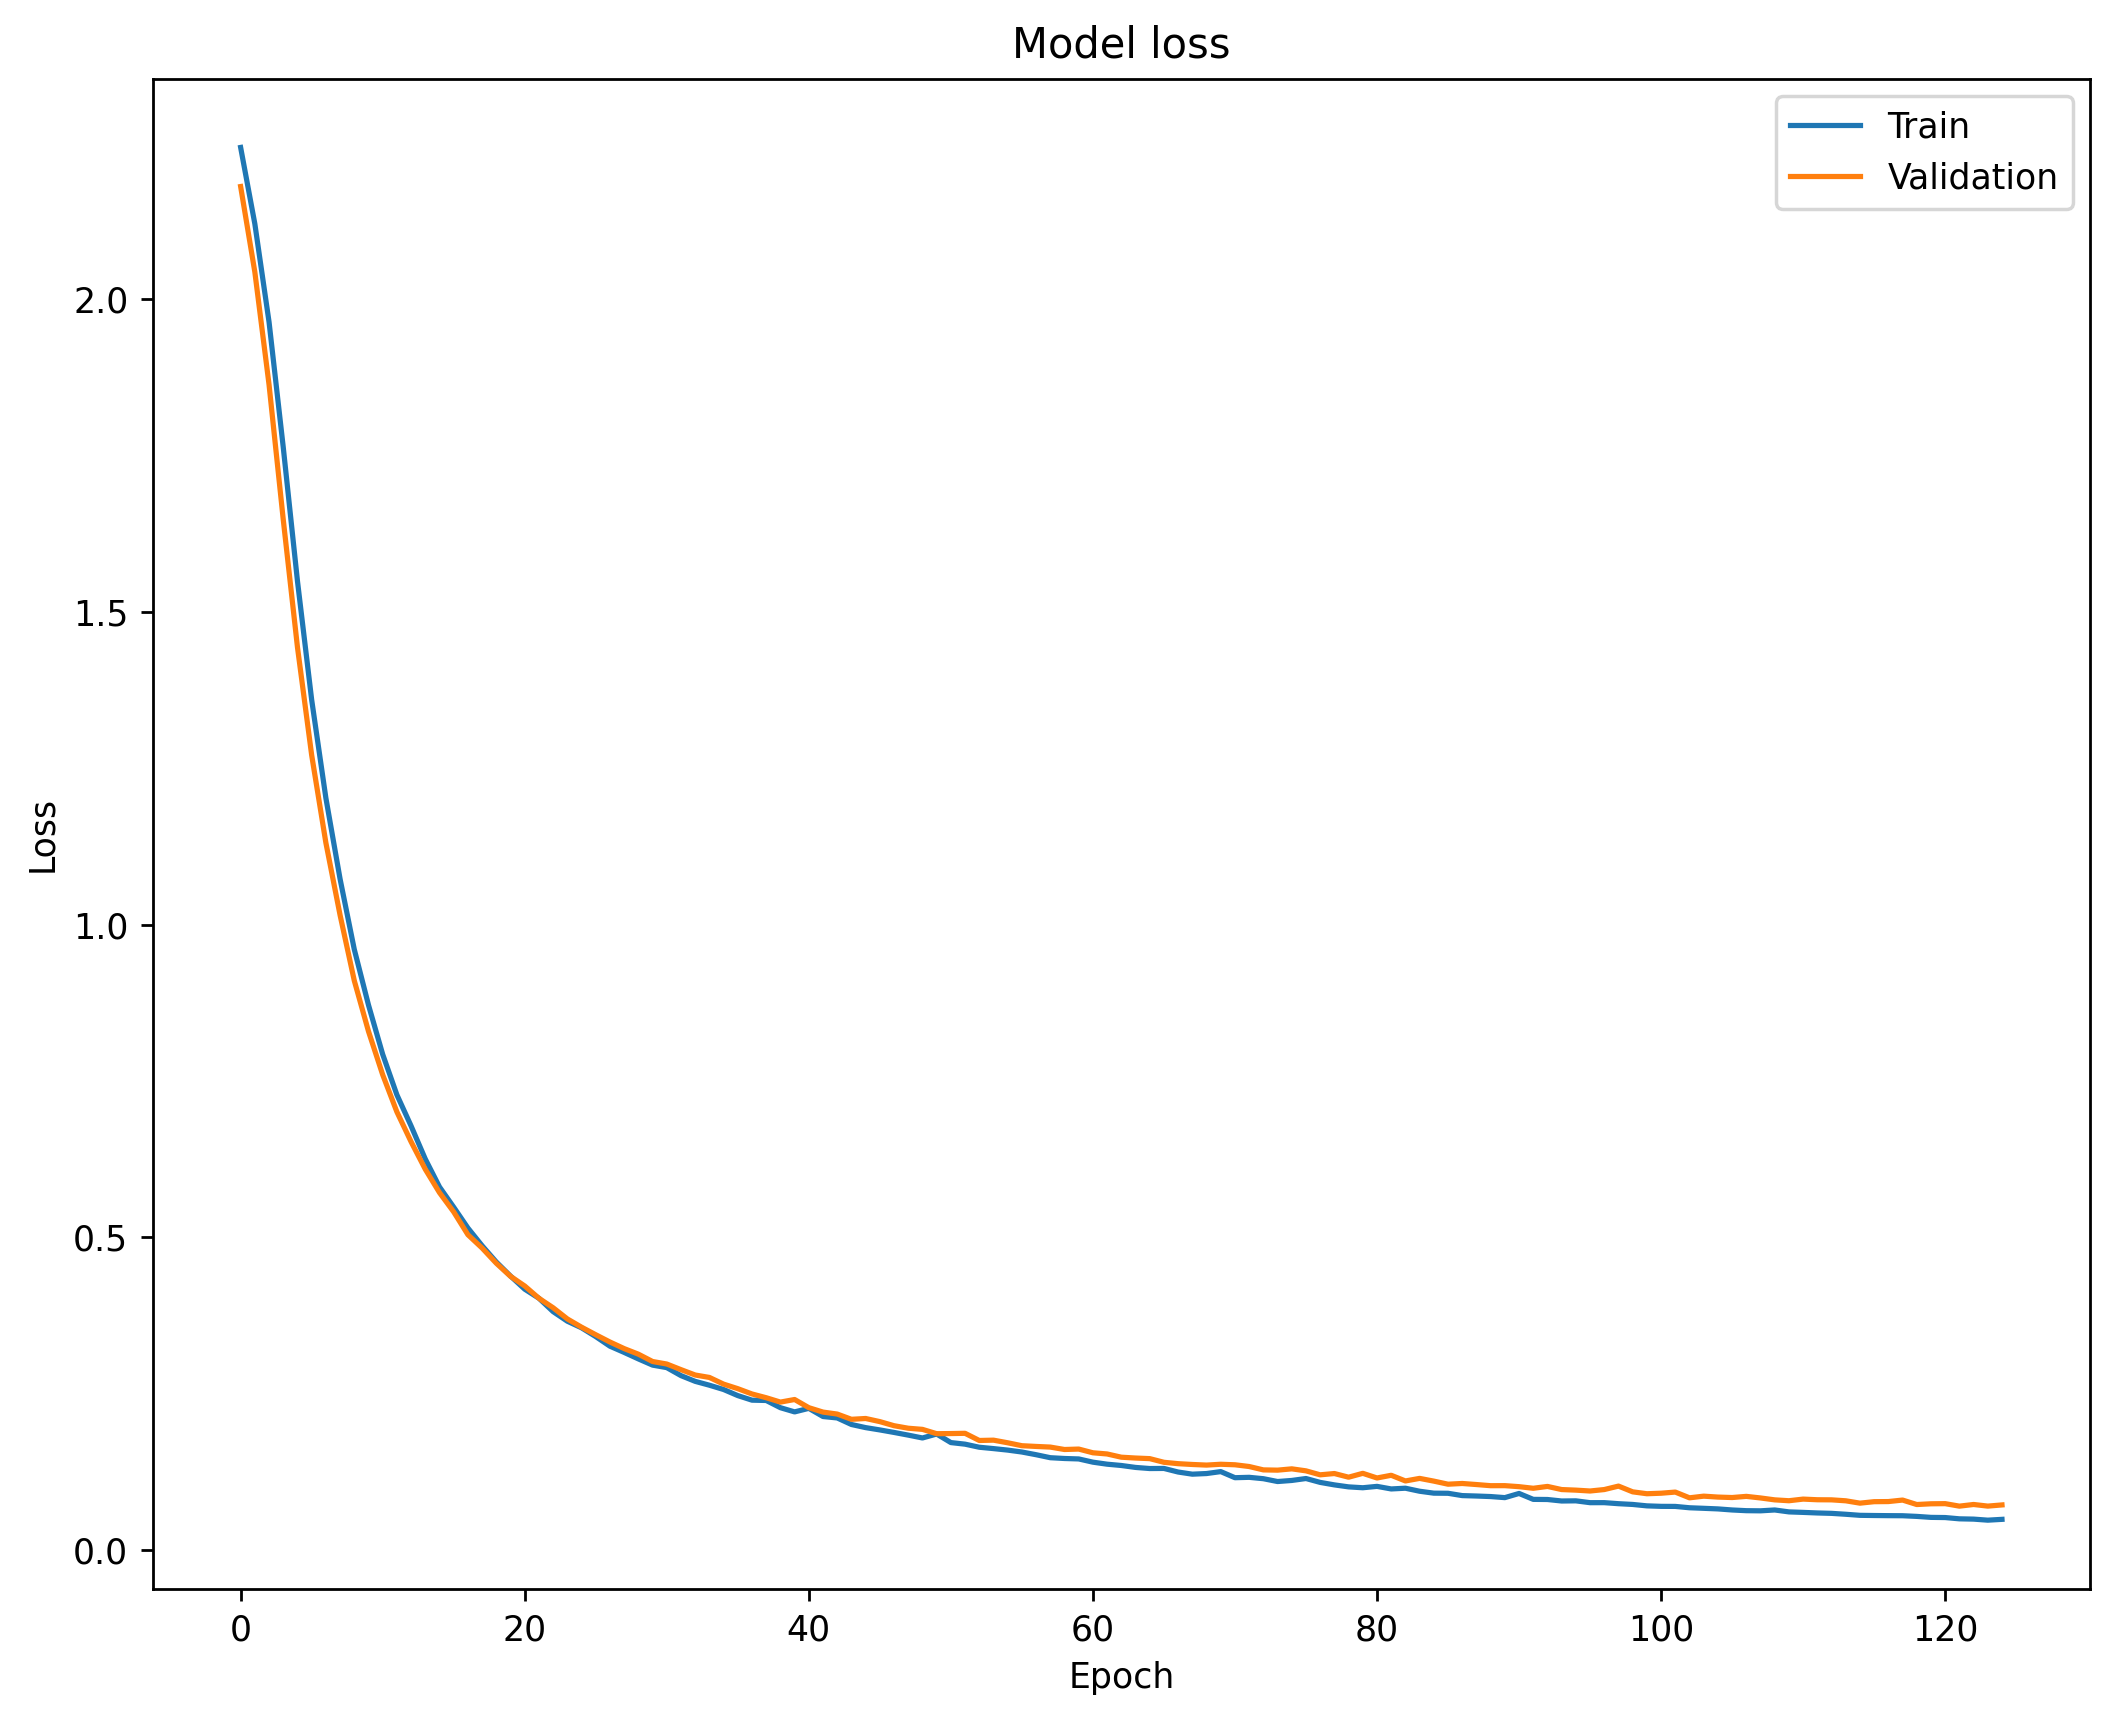

In [19]:
# Summarize history for accuracy
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_accuracy)
plt.plot(mean_val_accuracy)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(NAME + '_Accuracy.png')
plt.show()

# Summarize history for loss
plt.figure(figsize=(10,8), dpi=250)
plt.plot(mean_loss)
plt.plot(mean_val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig(NAME + '_Loss.png')
plt.show()

## **Evaluation of the experiments**

Here, the results of the different experiments are going to be compared so that the best one can be selected.

Firstly, the main metric involved is the **accuracy** of the models, so let's analyse the results.

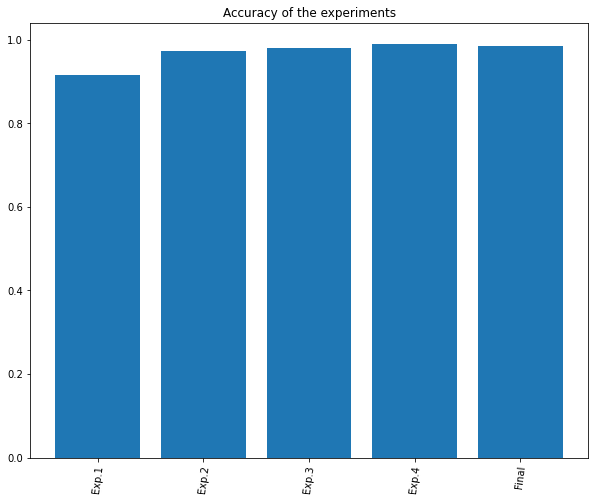

In [20]:
# A plot with all the accuracies is generated
langs = ['Exp.1', 'Exp.2', 'Exp.3', 'Exp.4', 'Final']

plt.figure(figsize=(10,8))
plt.bar(langs, experiments)
plt.title('Accuracy of the experiments')
plt.xticks(rotation='82.5')

plt.savefig('Accuracy_Bar_Plot.png',dpi=400)
plt.show()


In [21]:
# Returns the class corresponding to the predictions
def decide_class (result):
    maximum = np.max(result)
    index = np.where(result == maximum)
    for i in range (0, len(result)):
      if i == index[0][0]:
        result[i] = 1
      else:
        result[i] = 0

# Returns meaning of the result obatined
def decodeResult(result):
  maximum = np.max(result)
  index = np.where(result == maximum)
  if index[0][0] == 0:
    return "left_dorsal"
  elif index[0][0] == 1:
    return "left_hip"
  elif index[0][0] == 2:
    return "lotus"
  elif index[0][0] == 3:
    return "mountain"
  elif index[0][0] == 4:
    return "right_dorsal"
  elif index[0][0] == 5:
    return "right_hip"
  elif index[0][0] == 6:
    return "sun"
  elif index[0][0] == 7:
    return "tree"
  elif index[0][0] == 8:
    return "triangle"
  else:
    return "y"

In [22]:
model_final.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 34)                1190      
_________________________________________________________________
dense_128 (Dense)            (None, 20)                700       
_________________________________________________________________
dense_129 (Dense)            (None, 10)                210       
Total params: 2,100
Trainable params: 2,100
Non-trainable params: 0
_________________________________________________________________


In [23]:
loss, accuracy = model_final.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9835
Accuracy: 98.35
Loss: 6.79


In [24]:
# Predictions are generated
y_pred = model_final.predict(x_test)

# Transforms predictions into a single class
for element in y_pred:
  element = decide_class(element)

new_y_pred = []
# Decode predictions using neural network
for i in range(0, len(y_pred)):
  new_y_pred.append(decodeResult(y_pred[i]))

new_y_test = []
aux = np.array(y_test)
# Decode predictions of the test
for i in range(0, len(aux)):
  new_y_test.append(decodeResult(aux[i]))

Evaluation metrics for neural network model:
Accuracy: 0.9835
Precision: 0.9835
Recall: 0.9835
f1: 0.9835


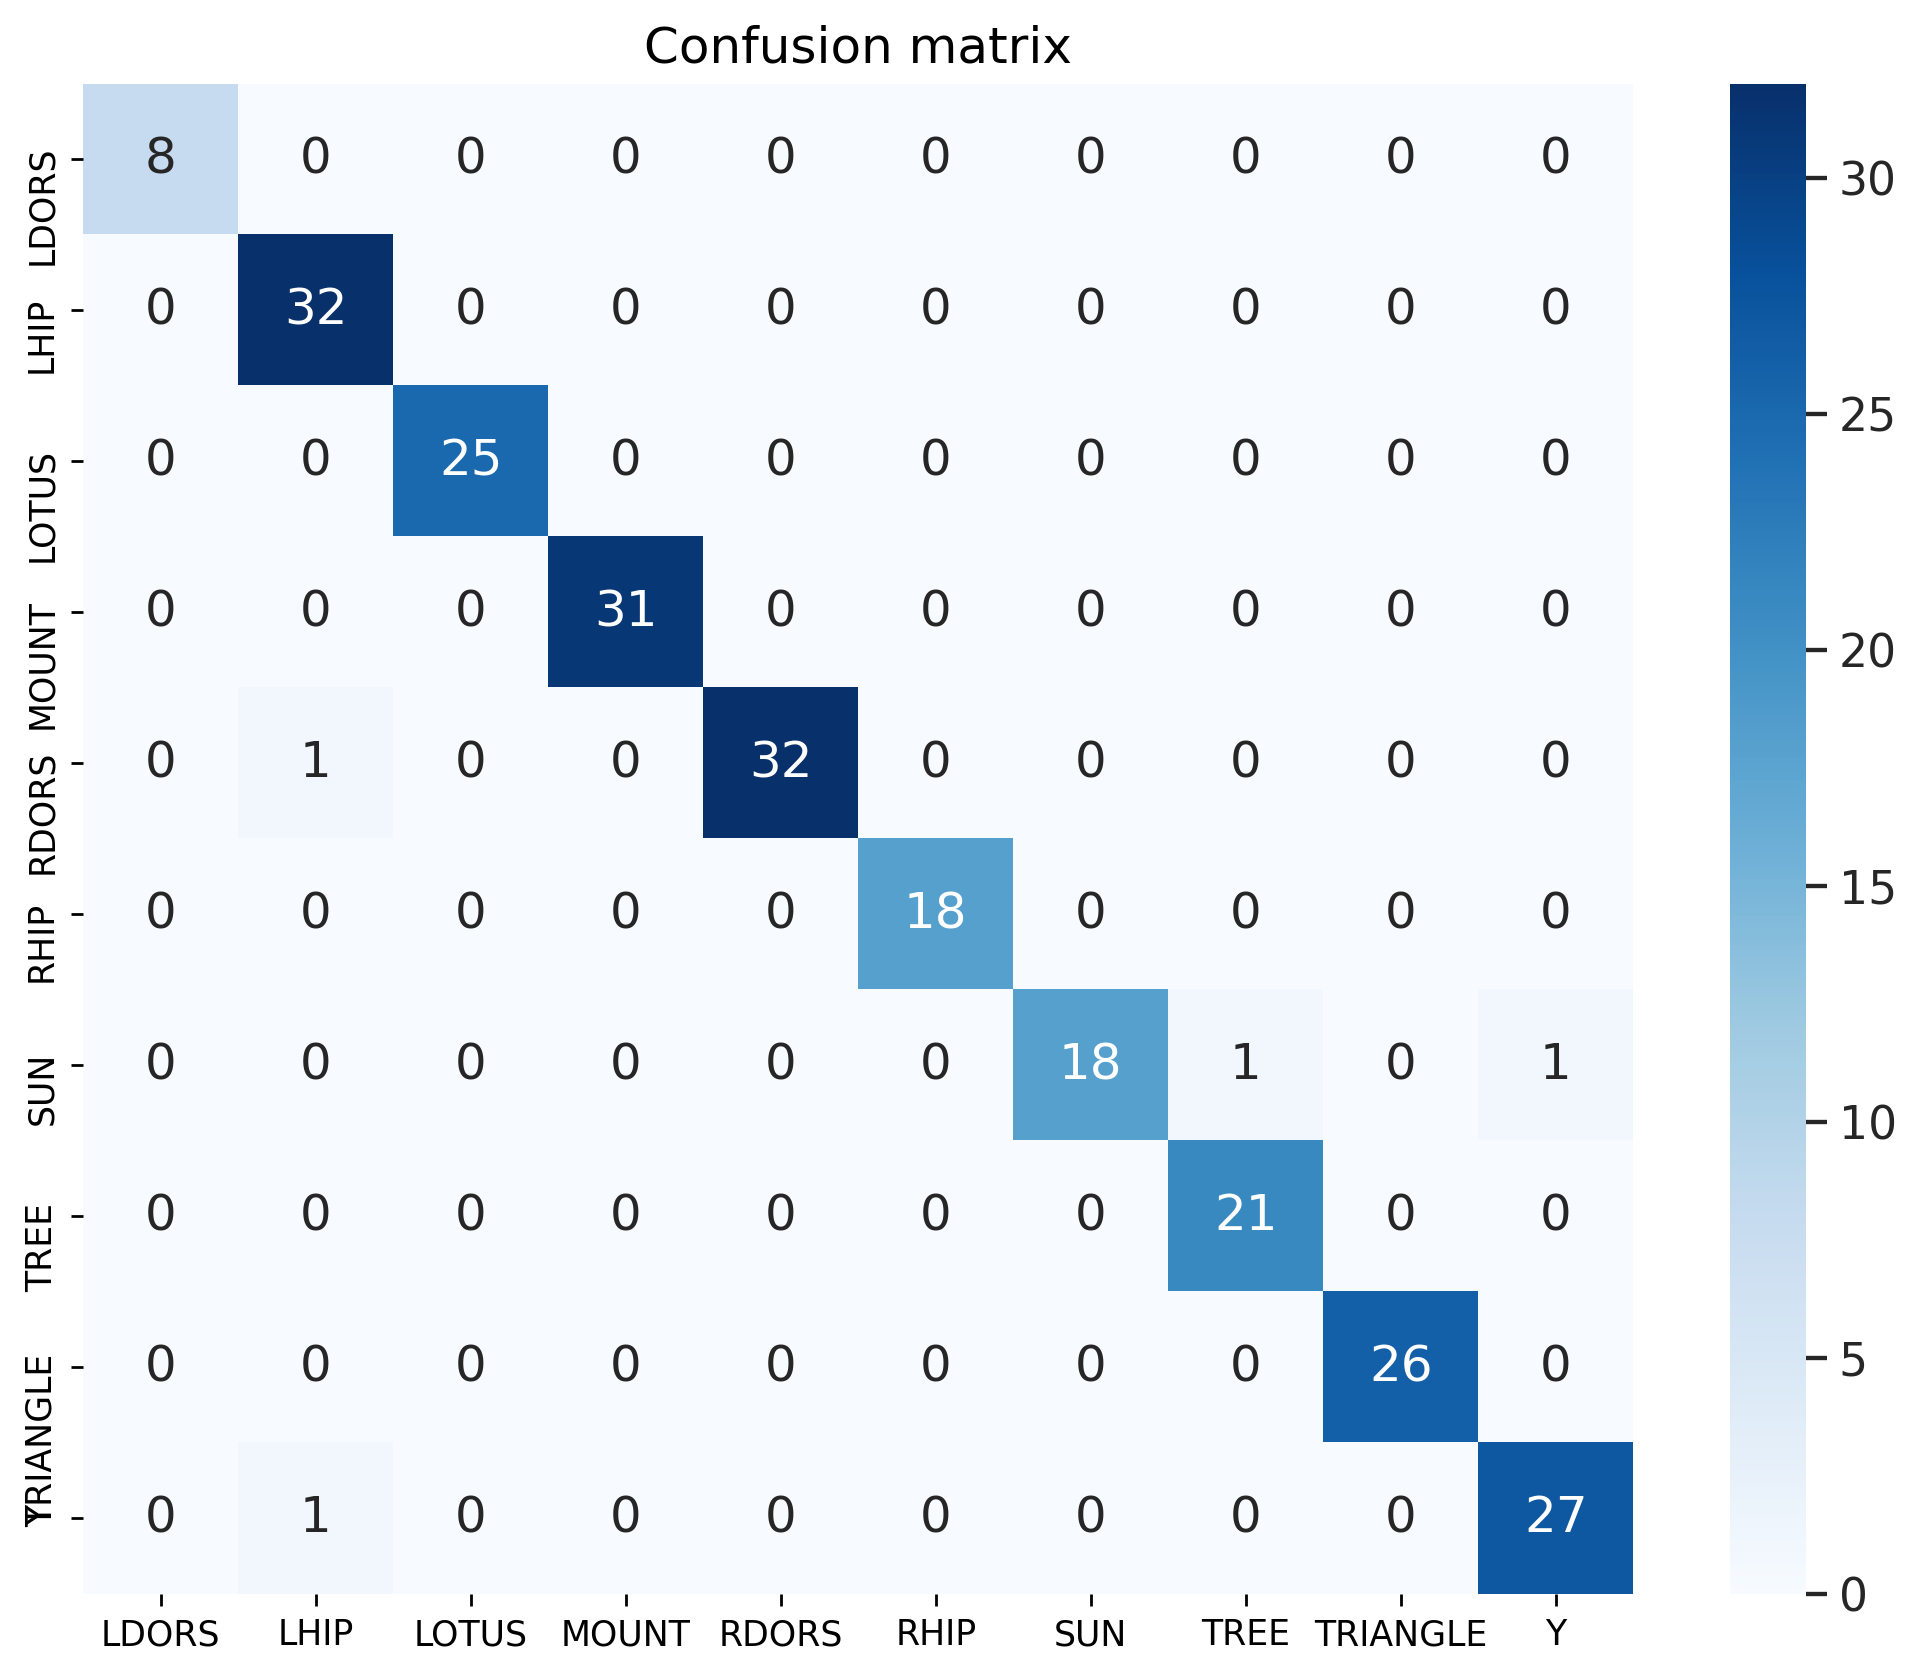

In [25]:
# More significative metrics are calculated
confmat = metrics.confusion_matrix(new_y_test, new_y_pred)
accuracy = metrics.accuracy_score(new_y_test, new_y_pred)
precision = metrics.precision_score(new_y_test, new_y_pred, average='micro')
recall = metrics.recall_score(new_y_test, new_y_pred, average='micro')
f1 = metrics.f1_score(new_y_test, new_y_pred, average='micro')

print("Evaluation metrics for neural network model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"f1: {f1:.4f}")

# Confusion matrix is displayed
plt.figure(figsize=(10,8), dpi=250)
ax = plt.subplot()
sns.set(font_scale=1.2) 
sns.heatmap(confmat, annot=True, ax=ax, cmap="Blues", fmt="g");
ax.tick_params(axis='both', which='major', labelsize=10) 
ax.xaxis.set_ticklabels(['LDORS', 'LHIP', 'LOTUS', 'MOUNT', 'RDORS', 'RHIP', 'SUN', 'TREE', 'TRIANGLE', 'Y']);
ax.yaxis.set_ticklabels(['LDORS', 'LHIP', 'LOTUS', 'MOUNT', 'RDORS', 'RHIP', 'SUN', 'TREE', 'TRIANGLE', 'Y']);
plt.title('Confusion matrix')
plt.savefig('Confusion_Matrix.png')
plt.show()

# **Download model**

Model is saved into a compatible form with tensorflow.js and a zip is created to make model easy to download.

In [26]:
# Save model 
model_final.save('model.h5')

In [27]:
pip install tensorflowjs

     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 112kB 13.7MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [28]:
# Save model into a compatible form with tensorflow.js
import tensorflowjs as tfjs
import os

currdir = os.getcwd()
path = currdir + "/tfjs_files"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

tfjs.converters.save_keras_model(model_final, path)

Successfully created the directory /content/tfjs_files 


/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [29]:
import shutil

# Create zip to make model easy to download
shutil.make_archive('tfjs_files', 'zip', path)

'/content/tfjs_files.zip'